# IMPORTING LIBRARIES & READING DATASET


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pycountry
import requests
import statsmodels
from pandas.api.types import CategoricalDtype

Defaulting to user installation because normal site-packages is not writeable


In [9]:
file_path_2020 = './data/kaggle_survey_2020_responses.csv'
file_path_2021 = './data/kaggle_survey_2021_responses.csv'
file_path_2022 = './data/kaggle_survey_2022_responses.csv'
file_path_continents = './data/continent.csv'
continents = pd.read_csv(file_path_continents, encoding = 'UTF-8')
df_2020 = pd.read_csv(file_path_2020, encoding = 'UTF-8')
df_2021 = pd.read_csv(file_path_2021, encoding = 'UTF-8')
df_2022 = pd.read_csv(file_path_2022, encoding = 'UTF-8')

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# DATA CLEANING: 2020

## Data Copy

In [10]:
df_2020_copy = df_2020.copy()
df_2020_copy.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning Data

Drop columns for questions that we don't need for the analysis.

In [11]:
print(df_2020_copy.columns)

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)


In [12]:
# Drop columns for unwanted questions
regex_start_with = '^Q8|^Q9|^Q10|^Q11|^Q12|^Q13|^Q14|^Q17|^Q18|^Q19|^Q23|^Q25|^Q27|^Q30|^Q31|^Q32|^Q35|^Q36|^Q38|^Q39'

# Drop columns that somewhat look like 'Q26_B_Part_1' to 'Q35_B_OTHER'
regex_B_part = '^Q\d+_B_Part_\d+|^Q\d+_B_OTHER'

# Drop columns that ends with '_OTHER'
regex_OTHER = '_OTHER$'

# Concatenate the two regex patterns
regex = f'{regex_start_with}|{regex_B_part}|{regex_OTHER}'

# Filter columns that match the pattern
cols_to_drop = df_2020_copy.filter(regex=regex).columns

# Drop the columns
df_2020_copy = df_2020_copy.drop(columns=cols_to_drop)

In [13]:
# Drop the columns with 'selected choice - none'
first_row = df_2020_copy.iloc[0]
cols_to_drop = []
for col in df_2020_copy.columns:
    # Check if the value in the first row contains 'selected choice - none' or 'selected choice - no / none'
    if 'selected choice - none' in str(first_row[col]).lower().strip():
        cols_to_drop.append(col)
    elif 'selected choice - no / none' in str(first_row[col]).lower().strip():
        cols_to_drop.append(col)
df_2020_copy = df_2020_copy.drop(columns=cols_to_drop)

In [14]:
# drop unused column: "time from start to finish (seconds)"
df_2020_copy.drop('Time from Start to Finish (seconds)', axis = 1, inplace = True)
print(df_2020_copy.columns)
print(df_2020_copy.shape)

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2',
       'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7',
       'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q15',
       'Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5',
       'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10',
       'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13', 'Q16_Part_14', 'Q20',
       'Q21', 'Q22', 'Q24', 'Q26_A_Part_1', 'Q26_A_Part_2', 'Q26_A_Part_3',
       'Q26_A_Part_4', 'Q26_A_Part_5', 'Q26_A_Part_6', 'Q26_A_Part_7',
       'Q26_A_Part_8', 'Q26_A_Part_9', 'Q26_A_Part_10', 'Q28_A_Part_1',
       'Q28_A_Part_2', 'Q28_A_Part_3', 'Q28_A_Part_4', 'Q28_A_Part_5',
       'Q28_A_Part_6', 'Q28_A_Part_7', 'Q28_A_Part_8', 'Q28_A_Part_9',
       'Q29_A_Part_1', 'Q29_A_Part_2', 'Q29_A_Part_3', 'Q29_A_Part_4',
       'Q29_A_Part_5', 'Q29_A_Part_6', 'Q29_A_Part_7', 'Q29_A_Part_8',
       'Q29_A_Part_9', 'Q29_A_Part_10', 'Q29_A_Part_11', 'Q

Deal with missing values: drop records that either has missing values for all of the multiple choice columns or have any missing values for the essential non-multiple choice columns. 

In [15]:
#check the column indexes for dealing with null values
for i, col_name in enumerate(df_2020_copy.columns):
    print(f'Index: {i}, Column Name: {col_name}')

Index: 0, Column Name: Q1
Index: 1, Column Name: Q2
Index: 2, Column Name: Q3
Index: 3, Column Name: Q4
Index: 4, Column Name: Q5
Index: 5, Column Name: Q6
Index: 6, Column Name: Q7_Part_1
Index: 7, Column Name: Q7_Part_2
Index: 8, Column Name: Q7_Part_3
Index: 9, Column Name: Q7_Part_4
Index: 10, Column Name: Q7_Part_5
Index: 11, Column Name: Q7_Part_6
Index: 12, Column Name: Q7_Part_7
Index: 13, Column Name: Q7_Part_8
Index: 14, Column Name: Q7_Part_9
Index: 15, Column Name: Q7_Part_10
Index: 16, Column Name: Q7_Part_11
Index: 17, Column Name: Q15
Index: 18, Column Name: Q16_Part_1
Index: 19, Column Name: Q16_Part_2
Index: 20, Column Name: Q16_Part_3
Index: 21, Column Name: Q16_Part_4
Index: 22, Column Name: Q16_Part_5
Index: 23, Column Name: Q16_Part_6
Index: 24, Column Name: Q16_Part_7
Index: 25, Column Name: Q16_Part_8
Index: 26, Column Name: Q16_Part_9
Index: 27, Column Name: Q16_Part_10
Index: 28, Column Name: Q16_Part_11
Index: 29, Column Name: Q16_Part_12
Index: 30, Column Nam

In [16]:
# drop null values for linked multiple choice columns
indices = np.r_[6:17, 18:32, 36:97]
column_names = df_2020_copy.columns[indices]
df_2020_copy = df_2020_copy.dropna(subset=column_names, how='all')

# drop null values for other non-multiple choice columns
indices_two = np.r_[0:6, 17, 32:36]
column_names_two = df_2020_copy.columns[indices_two]
df_2020_copy = df_2020_copy.dropna(subset=column_names_two, how='any')

#Remove "_Part_" and "_A_Part_" in the column names in preparation for renaming the columns.
df_2020_copy.columns = df_2020_copy.columns.str.replace('(_Part_)|(_A_Part_)', '_', regex=True)

Renaming the columns by extracting the element after selected_choice in the survey question (i.e. first row of the dataframe).

In [17]:
#count number of parts within the multiple choice Qs
num_list = [i for i in range(7, 38)]
def count_cols_in_question(df, string, num_list):
    results = {}
    for i in num_list:
        is_string_in_cols = '{}{}'.format(string, i)
        count = sum([is_string_in_cols in col for col in df.columns])
        if count > 1:
            results[is_string_in_cols] = count
    return results
multiple_choice_dict = count_cols_in_question(df_2020_copy,'Q',num_list)
print(multiple_choice_dict)

{'Q7': 11, 'Q16': 14, 'Q26': 10, 'Q28': 9, 'Q29': 16, 'Q33': 6, 'Q34': 10, 'Q37': 10}


In [18]:
# create a function that renames the columns
columns_dict = {'Q7': 11, 'Q16': 14, 'Q26': 10, 'Q28': 9, 'Q29': 16, 'Q33': 6, 'Q34': 10, 'Q37': 10}

subsets = {key: [f'{key}_{i}' for i in range(1, columns_dict[key] + 1)] for key in columns_dict.keys()}
def subset_change_string(subsets, q_string, new_string):
    result = []
    if q_string in subsets:
        for column in subsets[q_string]:
            selected_choice = str(df_2020_copy.loc[0, column]).split('Selected Choice -')[1].strip()
            result.append(new_string + '_' + selected_choice)
    return result if result else None


In [19]:
# create a list for the new column names, in capital letter
list = ["age", "gender", "country", "highest_education", "current_job_title", "time_writing_code"]
list.extend(subset_change_string(subsets, 'Q7', 'tools_used'))
list.extend(["years_machine_learning"])
list.extend(subset_change_string(subsets, 'Q16', 'tools_used'))
list.extend(["company_size", "team_size", "employer_use_ml", "yearly_compensation"])
index_list = ['Q26','Q28','Q29','Q33','Q34']
for index in index_list:
  list.extend(subset_change_string(subsets, index, 'tools_used'))
list.extend(subset_change_string(subsets, 'Q37', 'learning_platforms'))

In [20]:
#a function to reformat the list (connect with underscores and in lower cases)
import re
def formatting_list(list):
    return [re.sub(r'\W+', '_', item.lower()) for item in list]
#apply the function to our original column names list
formatted_names = formatting_list(list)

#apply the new column names to the df
df_2020_copy.columns = formatted_names


In [21]:
df_2020_copy.columns

Index(['age', 'gender', 'country', 'highest_education', 'current_job_title',
       'time_writing_code', 'tools_used_python', 'tools_used_r',
       'tools_used_sql', 'tools_used_c', 'tools_used_c_', 'tools_used_java',
       'tools_used_javascript', 'tools_used_julia', 'tools_used_swift',
       'tools_used_bash', 'tools_used_matlab', 'years_machine_learning',
       'tools_used_scikit_learn', 'tools_used_tensorflow', 'tools_used_keras',
       'tools_used_pytorch', 'tools_used_fast_ai', 'tools_used_mxnet',
       'tools_used_xgboost', 'tools_used_lightgbm', 'tools_used_catboost',
       'tools_used_prophet', 'tools_used_h2o_3', 'tools_used_caret',
       'tools_used_tidymodels', 'tools_used_jax', 'company_size', 'team_size',
       'employer_use_ml', 'yearly_compensation',
       'tools_used_amazon_web_services_aws_', 'tools_used_microsoft_azure',
       'tools_used_google_cloud_platform_gcp_', 'tools_used_ibm_cloud_red_hat',
       'tools_used_oracle_cloud', 'tools_used_sap_cloud',


Make some changes to the column names (to correct typos in data collection process), and add a column to indicate the year.

In [22]:
#Add a year column to specify the year
df_2020_copy['year'] = 2020

# Rename some columns that have typo in it.
df_2020_copy.rename(columns={'tools_used_h20_driverless_ai': 'tools_used_h2o_driverless_ai', 'tools_used_automation_of_full_ml_pipelines_e_g_google_automl_h20_driverless_ai_': 'tools_used_automation_of_full_ml_pipelines_e_g_google_automl_h2o_driverless_ai_'}, inplace = True)
df_2020_copy.rename(columns={'tools_used_postgressql': 'tools_used_postgresql'}, inplace = True)

# Strip the column names of white spaces
df_2020_copy.columns = df_2020_copy.columns.str.strip()

# Drop the first row of the dataframe after renaming
df_2020_copy.drop(df_2020_copy.index[0], inplace=True)

mapping data in buckets to our decided buckets. 

In [23]:
#check for age values and map them to the brackets
df_2020_copy['age'].unique()

array(['30-34', '35-39', '22-24', '55-59', '50-54', '25-29', '18-21',
       '40-44', '60-69', '45-49', '70+'], dtype=object)

In [24]:
# Define a dictionary mapping the old age ranges to the new age ranges
age_range_mapping = {
    '18-21': '18-24',
    '22-24': '18-24',
    '25-29': '25-29',
    '30-34': '30-34',
    '35-39': '35-39',
    '40-44': '40-44',
    '45-49': '45-49',
    '50-54': '50+',
    '55-59': '50+',
    '60-69': '50+',
    '70+': '50+'
}

In [25]:
#check for company size and map them to the brackets
df_2020_copy['company_size'].unique()

array(['10,000 or more employees', '1000-9,999 employees',
       '250-999 employees', '0-49 employees', '50-249 employees'],
      dtype=object)

In [26]:
# Define a dictionary mapping the old categories to the new categories
employer_size_mapping = {
    '0-49 employees': '0-49',
    '50-249 employees': '50-249',
    '250-999 employees': '250-999',
    '1000-9,999 employees': '1000-9,999',
    '10,000 or more employees': '10,000+'
}


In [27]:
# Get the unique values in the "gender" column
df_2020_copy['gender'].unique()

array(['Man', 'Woman', 'Nonbinary', 'Prefer not to say',
       'Prefer to self-describe'], dtype=object)

In [28]:
# Define a dictionary mapping the old gender categories to the new gender categories
gender_mapping = {
    'What is your gender? - Selected Choice': 'What is your gender? - Selected Choice',
    'Man': 'male',
    'Woman': 'female',
    'Nonbinary': 'other',
    'Prefer not to say': 'other',
    'Prefer to self-describe': 'other'
}

In [29]:
# Replace the old age, company size, and gender ranges with the new age ranges
df_2020_copy['age'] = df_2020_copy['age'].replace(age_range_mapping)
df_2020_copy['company_size'] = df_2020_copy['company_size'].replace(employer_size_mapping)
df_2020_copy['gender'] = df_2020_copy['gender'].replace(gender_mapping)

check the cleaned dataset

In [30]:
df_2020_copy.head()

,age,gender,country,highest_education,current_job_title,time_writing_code,tools_used_python,tools_used_r,tools_used_sql,tools_used_c,...,learning_platforms_edx,learning_platforms_kaggle_learn_courses,learning_platforms_datacamp,learning_platforms_fast_ai,learning_platforms_udacity,learning_platforms_udemy,learning_platforms_linkedin_learning,learning_platforms_cloud_certification_programs_direct_from_aws_azure_gcp_or_similar_,learning_platforms_university_courses_resulting_in_a_university_degree_,year
2,30-34,male,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,DataCamp,NaN,NaN,Udemy,NaN,NaN,NaN,2020
3,35-39,male,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,edX,NaN,NaN,NaN,Udacity,Udemy,NaN,NaN,NaN,2020
4,30-34,male,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,DataCamp,NaN,NaN,NaN,LinkedIn Learning,NaN,University Courses (resulting in a university ...,2020
9,35-39,male,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,Fast.ai,Udacity,Udemy,LinkedIn Learning,NaN,NaN,2020
12,35-39,male,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020


# DATA CLEANING: 2021

## Data Copy

In [31]:
# Create copy of data for cleaning 
clean_df_2021 = df_2021.copy()

## DATA CLEANING

Dropping columns that we don't want to include for the analysis. 

In [32]:
# Drop columns that start with the strings in the regex below:
regex_start_with = '^Q8|^Q9|^Q10|^Q11|^Q12|^Q13|^Q14|^Q17|^Q18|^Q24|^Q26|^Q28|^Q30|^Q33|^Q34|^Q35|^Q38|^Q39|^Q41|^Q42'

# Drop columns that look like 'Q26_B_Part_1' to 'Q35_B_OTHER'
regex_B_part = '^Q\d+_B_Part_\d+|^Q\d+_B_OTHER'

# Drop columns that ends with '_OTHER'
regex_OTHER = '_OTHER$'

# Concatenate the two regex patterns
regex = f'{regex_start_with}|{regex_B_part}|{regex_OTHER}'

# Filter columns that match the pattern
cols_to_drop = clean_df_2021.filter(regex=regex).columns

# Drop the columns
clean_df_2021 = clean_df_2021.drop(columns=cols_to_drop)

In [33]:
# Drop columns with 'None' in the question names (first row):
first_row = clean_df_2021.iloc[0]
cols_to_drop = []
for col in clean_df_2021.columns:
    # Check if the value in the first row contains 'selected choice - none' or 'selected choice - no / none'
    if 'selected choice - none' in str(first_row[col]).lower().strip():
        cols_to_drop.append(col)
    elif 'selected choice - no / none' in str(first_row[col]).lower().strip():
        cols_to_drop.append(col)
clean_df_2021 = clean_df_2021.drop(columns=cols_to_drop)

Add a year column to the dataset

In [34]:
# Change the name of the first column to "year"
clean_df_2021.rename(columns={clean_df_2021.columns[0]: 'year'}, inplace=True)

# Set all values in the "year" column to 2021
clean_df_2021['year'] = 2021

Rename the columns by extracting the "selected choice" from the survey questions in the first row.

In [35]:
# Removing 'Part' and 'A' from column names
clean_df_2021.columns = clean_df_2021.columns.str.replace('(_Part_)', '_', regex=True)
clean_df_2021.columns = clean_df_2021.columns.str.replace('(_A_)', '_', regex=True)

# Print the column names as a list
column_names = clean_df_2021.columns.tolist()
print(column_names)

['year', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q7_8', 'Q7_9', 'Q7_10', 'Q7_11', 'Q15', 'Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9', 'Q16_10', 'Q16_11', 'Q16_12', 'Q16_13', 'Q16_14', 'Q16_15', 'Q16_16', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q20', 'Q21', 'Q22', 'Q23', 'Q25', 'Q27_1', 'Q27_2', 'Q27_3', 'Q27_4', 'Q27_5', 'Q27_6', 'Q27_7', 'Q27_8', 'Q27_9', 'Q27_10', 'Q29_1', 'Q29_2', 'Q29_3', 'Q31_1', 'Q31_2', 'Q31_3', 'Q31_4', 'Q31_5', 'Q31_6', 'Q31_7', 'Q31_8', 'Q32_1', 'Q32_2', 'Q32_3', 'Q32_4', 'Q32_5', 'Q32_6', 'Q32_7', 'Q32_8', 'Q32_9', 'Q32_10', 'Q32_11', 'Q32_12', 'Q32_13', 'Q32_14', 'Q32_15', 'Q32_16', 'Q32_17', 'Q32_18', 'Q32_19', 'Q36_1', 'Q36_2', 'Q36_3', 'Q36_4', 'Q36_5', 'Q36_6', 'Q37_1', 'Q37_2', 'Q37_3', 'Q37_4', 'Q37_5', 'Q37_6', 'Q40_1', 'Q40_2', 'Q40_3', 'Q40_4', 'Q40_5', 'Q40_6', 'Q40_7', 'Q40_8', 'Q40_9', 'Q40_10']


In [36]:
# Count number of parts within the multiple choice Qs
num_list = [i for i in range(7, 45)]

def count_cols_in_question(clean_df_2021, string, num_list):
    results = {}
    for i in num_list:
        is_string_in_cols = '{}{}'.format(string, i)
        count = sum([is_string_in_cols in col for col in clean_df_2021.columns])
        if count > 1:
            results[is_string_in_cols] = count
    return results

multiple_choice_dict=count_cols_in_question(clean_df_2021,'Q',num_list)
print(multiple_choice_dict)

{'Q7': 11, 'Q16': 16, 'Q19': 4, 'Q27': 10, 'Q29': 3, 'Q31': 8, 'Q32': 19, 'Q36': 6, 'Q37': 6, 'Q40': 10}


In [37]:
# get the new column names for the multiple choice questions 
columns_dict = multiple_choice_dict

subsets = {key: [f'{key}_{i}' for i in range(1, columns_dict[key] + 1)] for key in columns_dict.keys()}
def subset_change_string(subsets, q_string, new_string):
    result = []
    if q_string in subsets:
        for column in subsets[q_string]:
            selected_choice = str(clean_df_2021.loc[0, column]).split('Selected Choice -')[1].strip()
            result.append(new_string + '_' + selected_choice)
    return result if result else None

In [38]:
# creating column name list

list = ["year","age", "gender", "country", "highest_education", "current_job_title", "time_writing_code"]
list.extend(subset_change_string(subsets, 'Q7', 'tools_used'))
list.extend(["years_machine_learning"])
list.extend(subset_change_string(subsets, 'Q16', 'tools_used'))
list.extend(subset_change_string(subsets, 'Q19', 'tools_used'))
list.extend(["industry","company_size", "team_size", "employer_use_ml", "yearly_compensation"])
index_list = ['Q27','Q29','Q31','Q32','Q36','Q37']
for index in index_list:
  list.extend(subset_change_string(subsets, index, 'tools_used'))
list.extend(subset_change_string(subsets, 'Q40', 'learning_platforms'))
print(list)

['year', 'age', 'gender', 'country', 'highest_education', 'current_job_title', 'time_writing_code', 'tools_used_Python', 'tools_used_R', 'tools_used_SQL', 'tools_used_C', 'tools_used_C++', 'tools_used_Java', 'tools_used_Javascript', 'tools_used_Julia', 'tools_used_Swift', 'tools_used_Bash', 'tools_used_MATLAB', 'years_machine_learning', 'tools_used_Scikit-learn', 'tools_used_TensorFlow', 'tools_used_Keras', 'tools_used_PyTorch', 'tools_used_Fast.ai', 'tools_used_MXNet', 'tools_used_Xgboost', 'tools_used_LightGBM', 'tools_used_CatBoost', 'tools_used_Prophet', 'tools_used_H2O 3', 'tools_used_Caret', 'tools_used_Tidymodels', 'tools_used_JAX', 'tools_used_PyTorch Lightning', 'tools_used_Huggingface', 'tools_used_Word embeddings/vectors (GLoVe, fastText, word2vec)', 'tools_used_Encoder-decorder models (seq2seq, vanilla transformers)', 'tools_used_Contextualized embeddings (ELMo, CoVe)', 'tools_used_Transformer language models (GPT-3, BERT, XLnet, etc)', 'industry', 'company_size', 'team_siz

In [39]:
# Checking whether list of column names matches number of columns in data
print(len(list) == clean_df_2021.shape[1])

True


In [40]:
# Formatting column names
def formatting_list(list_a):
    return [re.sub(r'\W+', '_', item.lower()) for item in list_a]

formatted_names = formatting_list(list)
print(formatted_names)

['year', 'age', 'gender', 'country', 'highest_education', 'current_job_title', 'time_writing_code', 'tools_used_python', 'tools_used_r', 'tools_used_sql', 'tools_used_c', 'tools_used_c_', 'tools_used_java', 'tools_used_javascript', 'tools_used_julia', 'tools_used_swift', 'tools_used_bash', 'tools_used_matlab', 'years_machine_learning', 'tools_used_scikit_learn', 'tools_used_tensorflow', 'tools_used_keras', 'tools_used_pytorch', 'tools_used_fast_ai', 'tools_used_mxnet', 'tools_used_xgboost', 'tools_used_lightgbm', 'tools_used_catboost', 'tools_used_prophet', 'tools_used_h2o_3', 'tools_used_caret', 'tools_used_tidymodels', 'tools_used_jax', 'tools_used_pytorch_lightning', 'tools_used_huggingface', 'tools_used_word_embeddings_vectors_glove_fasttext_word2vec_', 'tools_used_encoder_decorder_models_seq2seq_vanilla_transformers_', 'tools_used_contextualized_embeddings_elmo_cove_', 'tools_used_transformer_language_models_gpt_3_bert_xlnet_etc_', 'industry', 'company_size', 'team_size', 'employe

In [41]:
# Renaming columns
clean_df_2021.columns = formatted_names

In [42]:
# Removing white spaces from column names
clean_df_2021.columns = clean_df_2021.columns.str.strip()

In [43]:
# Checking column names
column_names = clean_df_2021.columns.tolist()
print(column_names)

['year', 'age', 'gender', 'country', 'highest_education', 'current_job_title', 'time_writing_code', 'tools_used_python', 'tools_used_r', 'tools_used_sql', 'tools_used_c', 'tools_used_c_', 'tools_used_java', 'tools_used_javascript', 'tools_used_julia', 'tools_used_swift', 'tools_used_bash', 'tools_used_matlab', 'years_machine_learning', 'tools_used_scikit_learn', 'tools_used_tensorflow', 'tools_used_keras', 'tools_used_pytorch', 'tools_used_fast_ai', 'tools_used_mxnet', 'tools_used_xgboost', 'tools_used_lightgbm', 'tools_used_catboost', 'tools_used_prophet', 'tools_used_h2o_3', 'tools_used_caret', 'tools_used_tidymodels', 'tools_used_jax', 'tools_used_pytorch_lightning', 'tools_used_huggingface', 'tools_used_word_embeddings_vectors_glove_fasttext_word2vec_', 'tools_used_encoder_decorder_models_seq2seq_vanilla_transformers_', 'tools_used_contextualized_embeddings_elmo_cove_', 'tools_used_transformer_language_models_gpt_3_bert_xlnet_etc_', 'industry', 'company_size', 'team_size', 'employe

In [44]:
# dropping row with the survey question names
clean_df_2021.drop(clean_df_2021.index[0], inplace=True)

mapping data in buckets to our decided buckets. 

In [45]:
# Get the unique values in the "age" column
unique_values = clean_df_2021['age'].unique()
print("Unique values in the 'age' column:", unique_values)

Unique values in the 'age' column: ['50-54' '22-24' '45-49' '25-29' '18-21' '30-34' '40-44' '35-39' '70+'
 '55-59' '60-69']


In [46]:
# Define a dictionary mapping the old age ranges to the new age ranges
age_range_mapping = {
    'What is your age (# years)?': 'What is your age (# years)?',
    '18-21': '18-24',
    '22-24': '18-24',
    '25-29': '25-29',
    '30-34': '30-34',
    '35-39': '35-39',
    '40-44': '40-44',
    '45-49': '45-49',
    '50-54': '50+',
    '55-59': '50+',
    '60-69': '50+',
    '70+': '50+'
}

# Replace the old age ranges with the new age ranges
clean_df_2021['age'] = clean_df_2021['age'].replace(age_range_mapping)

In [47]:
# Get the unique values in the "gender" column
unique_values = clean_df_2021['gender'].unique()
print("Unique values in the 'gender' column:", unique_values)

Unique values in the 'gender' column: ['Man' 'Woman' 'Nonbinary' 'Prefer not to say' 'Prefer to self-describe']


In [48]:
# Define a dictionary mapping the old gender categories to the new gender categories
gender_mapping = {
    'What is your gender? - Selected Choice': 'What is your gender? - Selected Choice',
    'Man': 'male',
    'Woman': 'female',
    'Nonbinary': 'other',
    'Prefer not to say': 'other',
    'Prefer to self-describe': 'other'
}

# Replace the old gender categories with the new gender categories
clean_df_2021['gender'] = clean_df_2021['gender'].replace(gender_mapping)

In [49]:
# Get the unique values in the "employer_size" column
unique_values = clean_df_2021['company_size'].unique()
print("Unique values in the 'company_size' column:", unique_values)

Unique values in the 'company_size' column: ['50-249 employees' '1000-9,999 employees' nan '10,000 or more employees'
 '0-49 employees' '250-999 employees']


In [50]:
# Define a dictionary mapping the old categories to the new categories
employer_size_mapping = {
    'What is the size of the company where you are employed?': 'What is the size of the company where you are employed?',
    '0-49 employees': '0-49',
    '50-249 employees': '50-249',
    '250-999 employees': '250-999',
    '1000-9,999 employees': '1000-9,999',
    '10,000 or more employees': '10,000+'
}

# Replace the old categories with the new categories
clean_df_2021['company_size'] = clean_df_2021['company_size'].replace(employer_size_mapping)


In [51]:
# Get the unique values in the "time_writing_code" column
unique_values = clean_df_2021['time_writing_code'].unique()
print("Unique values in the 'time_writing_code' column:", unique_values)

Unique values in the 'time_writing_code' column: ['5-10 years' '20+ years' '1-3 years' '< 1 years' '3-5 years'
 '10-20 years' 'I have never written code']


In [52]:
# Define a dictionary mapping the old categories to the new categories
time_writing_code_mapping = {
    'For how many years have you been writing code and/or programming?': 'For how many years have you been writing code and/or programming?',
    '< 1 years': '<1',
    '1-3 years': '1-3',
    '3-5 years': '3-5',
    '5-10 years': '5-10',
    '10-20 years': '11+',
    '20+ years': '11+',
    'I have never written code': 'Never'
}

# Replace the old categories with the new categories
clean_df_2021['time_writing_code'] = clean_df_2021['time_writing_code'].replace(time_writing_code_mapping)


In [53]:
# Get the unique values in the "comp_bucket" column
unique_values = clean_df_2021['yearly_compensation'].unique()
print("Unique values in the 'comp_bucket' column:", unique_values)

Unique values in the 'comp_bucket' column: ['25,000-29,999' '60,000-69,999' '$0-999' '30,000-39,999' nan
 '15,000-19,999' '70,000-79,999' '2,000-2,999' '10,000-14,999'
 '5,000-7,499' '20,000-24,999' '1,000-1,999' '100,000-124,999'
 '7,500-9,999' '4,000-4,999' '40,000-49,999' '50,000-59,999' '3,000-3,999'
 '300,000-499,999' '200,000-249,999' '125,000-149,999' '250,000-299,999'
 '80,000-89,999' '90,000-99,999' '150,000-199,999' '>$1,000,000'
 '$500,000-999,999']


### NULL VALUES

In [54]:
# Counting NAN values
age_count = clean_df_2021['age'].isna().sum()
gender_count = clean_df_2021['gender'].isna().sum()
country_count = clean_df_2021['country'].isna().sum()
education_count = clean_df_2021['highest_education'].isna().sum()
job_count = clean_df_2021['current_job_title'].isna().sum()
code_count = clean_df_2021['time_writing_code'].isna().sum()
ml_count = clean_df_2021['years_machine_learning'].isna().sum()
industry_count = clean_df_2021['industry'].isna().sum()
size_count = clean_df_2021['company_size'].isna().sum()
dataemp_count = clean_df_2021['team_size'].isna().sum()
mluse_count = clean_df_2021['employer_use_ml'].isna().sum()
comp_count = clean_df_2021['yearly_compensation'].isna().sum()
print("Age:", age_count)
print("Gender:", gender_count)
print("Country:", country_count)
print("Highest Education:", education_count)
print("Current Job:", job_count)
print("Time Writing Code:", code_count)
print("Machine Learning:", ml_count)
print("Industry:", industry_count)
print("Company Size:", size_count)
print("Data Team Size:", dataemp_count)
print("Machine Learning Use Time by Employer:", mluse_count)
print("Compensation:", comp_count)

Age: 0
Gender: 0
Country: 0
Highest Education: 0
Current Job: 0
Time Writing Code: 0
Machine Learning: 2219
Industry: 9648
Company Size: 9722
Data Team Size: 9847
Machine Learning Use Time by Employer: 10021
Compensation: 10582


In [55]:
columns_with_nan = ['age', 'gender', 'country', 'highest_education', 'current_job_title', 'time_writing_code', 'years_machine_learning', 'industry', 'company_size', 'team_size', 'employer_use_ml', 'yearly_compensation']
# Dropping NAN rows (in the columns specified above)
clean_df_2021 = clean_df_2021.dropna(subset=columns_with_nan)

In [56]:
# Finding indexes for all multiple choice questions
for i, col_name in enumerate(clean_df_2021.columns):
    print(f'Index: {i}, Column Name: {col_name}')

Index: 0, Column Name: year
Index: 1, Column Name: age
Index: 2, Column Name: gender
Index: 3, Column Name: country
Index: 4, Column Name: highest_education
Index: 5, Column Name: current_job_title
Index: 6, Column Name: time_writing_code
Index: 7, Column Name: tools_used_python
Index: 8, Column Name: tools_used_r
Index: 9, Column Name: tools_used_sql
Index: 10, Column Name: tools_used_c
Index: 11, Column Name: tools_used_c_
Index: 12, Column Name: tools_used_java
Index: 13, Column Name: tools_used_javascript
Index: 14, Column Name: tools_used_julia
Index: 15, Column Name: tools_used_swift
Index: 16, Column Name: tools_used_bash
Index: 17, Column Name: tools_used_matlab
Index: 18, Column Name: years_machine_learning
Index: 19, Column Name: tools_used_scikit_learn
Index: 20, Column Name: tools_used_tensorflow
Index: 21, Column Name: tools_used_keras
Index: 22, Column Name: tools_used_pytorch
Index: 23, Column Name: tools_used_fast_ai
Index: 24, Column Name: tools_used_mxnet
Index: 25, C

In [57]:
# Dropping rows with empty cells across all multiple choice questions 
indices = np.r_[7:18, 19:39, 44:106]
column_names = clean_df_2021.columns[indices]
clean_df_2021 = clean_df_2021.dropna(subset=column_names, how='all')

# Number of columns after cleaning data
clean_df_2021.shape

(14368, 106)

### FIXING MIXED DATA TYPES

In [58]:
# Checking which columns have mixed data types
def check_multiple_data_types(df):
    mixed_data_columns = []
    all_column_indexes = []  # List to store all column indexes
    
    for column_idx, column in enumerate(df.columns):
        unique_data_types = [type(value) for value in df.iloc[:, column_idx].values.tolist()]
        unique_data_types = set(unique_data_types)
        
        if len(unique_data_types) > 1:
            mixed_data_columns.append((column_idx, unique_data_types))
        
        all_column_indexes.append(column_idx)
    
    return mixed_data_columns, all_column_indexes

mixed_columns, column_indexes = check_multiple_data_types(clean_df_2021)

# Print different data types
print("Columns with multiple data types:")
for column in mixed_columns:
    column_idx, data_types = column
    print("Column Index:", column_idx)
    print("Data Types:", data_types)
    print()

# Print index list of columns with mixed data types
print("All Column Indexes:", column_indexes)

Columns with multiple data types:
Column Index: 7
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 8
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 9
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 10
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 11
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 12
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 13
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 14
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 15
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 16
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 17
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 19
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 20
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 21
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 22
Data Types: {<class 'float'>, <class 'str'>}

Column Index: 23
Data Ty

In [59]:
# Fix mixed data type error for the columns given in the index list above
column_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]
for index in column_indices:
    clean_df_2021.iloc[:, index] = clean_df_2021.iloc[:, index].astype(str)

# DATA CLEANING: 2022

## Data Copy

In [60]:
data = df_2022

In [61]:
df = data.copy()
df

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,331,22-24,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
23994,330,60-69,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23995,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23996,597,35-39,Woman,Israel,No,NaN,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [62]:
#add a column for year to the dataset
df = df.assign(year=2022)
df

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,year
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,2022
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN,2022
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,331,22-24,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,2022
23994,330,60-69,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,2022
23995,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,2022
23996,597,35-39,Woman,Israel,No,NaN,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,2022


Fix the mixed datatype issues for the columns.

In [63]:
#fix datatype warning cols: 0,208,225,255,257,260,270,271,277
data_types = {
    'Q36_6': str,
    'Q37_9': str,
    'Q40_6': str,
    'Q40_8': str,
    'Q40_11': str,
    'Q41_6': str,
    'Q41_7': str,
    'Q42_4': str
}

df = df.astype(data_types)

In [64]:
df = df.drop(['Duration (in seconds)'], axis=1)

Deal with missing data - drop records that has missing values for all of the multiple choice columns or for any essential non-multiple choice columns.

In [65]:
#check for missing data
import pandas as pd 
pd.options.display.max_rows = 300 #show all rows 
len(df) - df.count()

Q2            0
Q3            0
Q4            0
Q5            0
Q6_1      14298
Q6_2      21523
Q6_3      17369
Q6_4      20279
Q6_5      23053
Q6_6      21798
Q6_7      17881
Q6_8      21231
Q6_9      22176
Q6_10     17217
Q6_11     21354
Q6_12     18328
Q7_1      17146
Q7_2      10283
Q7_3      20687
Q7_4      11126
Q7_5      11297
Q7_6      22975
Q7_7      22053
Q8          599
Q9        11636
Q10_1     22448
Q10_2     21534
Q10_3     22084
Q11         754
Q12_1      5344
Q12_2     19426
Q12_3     14377
Q12_4     20196
Q12_5     22524
Q12_6     19448
Q12_7     20135
Q12_8     20508
Q12_9     22323
Q12_10    22554
Q12_11    21556
Q12_12    23701
Q12_13    23675
Q12_14    23741
Q12_15    22655
Q13_1     19110
Q13_2     20173
Q13_3     19581
Q13_4     14021
Q13_5     17898
Q13_6     21117
Q13_7     20106
Q13_8     21779
Q13_9     22549
Q13_10    21695
Q13_11    10313
Q13_12    22385
Q13_13    23588
Q13_14    22523
Q14_1     16519
Q14_2     15068
Q14_3     23112
Q14_4     23839
Q14_5   

In [66]:
#count number of parts within the multiple choice Qs
num_list = [i for i in range(6, 45)]

def count_cols_in_question(df, string, num_list):
    results = {}
    for i in num_list:
        is_string_in_cols = '{}{}'.format(string, i)
        count = sum([is_string_in_cols in col for col in df.columns])
        if count > 1:
            results[is_string_in_cols] = count
    return results

multiple_choice_dict = count_cols_in_question(df,'Q',num_list)
print(multiple_choice_dict)

{'Q6': 12, 'Q7': 7, 'Q10': 3, 'Q12': 15, 'Q13': 14, 'Q14': 16, 'Q15': 15, 'Q17': 15, 'Q18': 14, 'Q19': 8, 'Q20': 6, 'Q21': 10, 'Q28': 8, 'Q31': 12, 'Q33': 5, 'Q34': 8, 'Q35': 16, 'Q36': 15, 'Q37': 13, 'Q38': 8, 'Q39': 12, 'Q40': 15, 'Q41': 9, 'Q42': 9, 'Q44': 12}


In [67]:
columns_dict = multiple_choice_dict

subsets = {key: [f"{key}_{i}" for i in range(1, columns_dict[key]+1)] for key in columns_dict.keys()}
subsets

{'Q6': ['Q6_1',
  'Q6_2',
  'Q6_3',
  'Q6_4',
  'Q6_5',
  'Q6_6',
  'Q6_7',
  'Q6_8',
  'Q6_9',
  'Q6_10',
  'Q6_11',
  'Q6_12'],
 'Q7': ['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7'],
 'Q10': ['Q10_1', 'Q10_2', 'Q10_3'],
 'Q12': ['Q12_1',
  'Q12_2',
  'Q12_3',
  'Q12_4',
  'Q12_5',
  'Q12_6',
  'Q12_7',
  'Q12_8',
  'Q12_9',
  'Q12_10',
  'Q12_11',
  'Q12_12',
  'Q12_13',
  'Q12_14',
  'Q12_15'],
 'Q13': ['Q13_1',
  'Q13_2',
  'Q13_3',
  'Q13_4',
  'Q13_5',
  'Q13_6',
  'Q13_7',
  'Q13_8',
  'Q13_9',
  'Q13_10',
  'Q13_11',
  'Q13_12',
  'Q13_13',
  'Q13_14'],
 'Q14': ['Q14_1',
  'Q14_2',
  'Q14_3',
  'Q14_4',
  'Q14_5',
  'Q14_6',
  'Q14_7',
  'Q14_8',
  'Q14_9',
  'Q14_10',
  'Q14_11',
  'Q14_12',
  'Q14_13',
  'Q14_14',
  'Q14_15',
  'Q14_16'],
 'Q15': ['Q15_1',
  'Q15_2',
  'Q15_3',
  'Q15_4',
  'Q15_5',
  'Q15_6',
  'Q15_7',
  'Q15_8',
  'Q15_9',
  'Q15_10',
  'Q15_11',
  'Q15_12',
  'Q15_13',
  'Q15_14',
  'Q15_15'],
 'Q17': ['Q17_1',
  'Q17_2',
  'Q17_3',
  'Q17_4',
 

In [68]:
 #check all multiple choice Qs nulls
df = df.dropna(subset=[
'Q6_1','Q6_2',
   'Q6_3',
   'Q6_4',
   'Q6_5',
   'Q6_6',
   'Q6_7',
   'Q6_8',
   'Q6_9',
   'Q6_10',
   'Q6_11',
   'Q6_12', 
 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 
 'Q10_1', 'Q10_2', 'Q10_3', 
 'Q12_1',
   'Q12_2',
   'Q12_3',
   'Q12_4',
   'Q12_5',
   'Q12_6',
   'Q12_7',
   'Q12_8',
   'Q12_9',
   'Q12_10',
   'Q12_11',
   'Q12_12',
   'Q12_13',
   'Q12_14',
   'Q12_15', 
  'Q13_1',
   'Q13_2',
   'Q13_3',
   'Q13_4',
   'Q13_5',
   'Q13_6',
   'Q13_7',
   'Q13_8',
   'Q13_9',
   'Q13_10',
   'Q13_11',
   'Q13_12',
   'Q13_13',
   'Q13_14', 
 'Q14_1',
   'Q14_2',
   'Q14_3',
   'Q14_4',
   'Q14_5',
   'Q14_6',
   'Q14_7',
   'Q14_8',
   'Q14_9',
   'Q14_10',
   'Q14_11',
   'Q14_12',
   'Q14_13',
   'Q14_14',
   'Q14_15',
   'Q14_16', 
 'Q15_1',
   'Q15_2',
   'Q15_3',
   'Q15_4',
   'Q15_5',
   'Q15_6',
   'Q15_7',
   'Q15_8',
   'Q15_9',
   'Q15_10',
   'Q15_11',
   'Q15_12',
   'Q15_13',
   'Q15_14',
   'Q15_15', 
 'Q17_1',
   'Q17_2',
   'Q17_3',
   'Q17_4',
   'Q17_5',
   'Q17_6',
   'Q17_7',
   'Q17_8',
   'Q17_9',
   'Q17_10',
   'Q17_11',
   'Q17_12',
   'Q17_13',
   'Q17_14',
   'Q17_15', 
 'Q18_1',
   'Q18_2',
   'Q18_3',
   'Q18_4',
   'Q18_5',
   'Q18_6',
   'Q18_7',
   'Q18_8',
   'Q18_9',
   'Q18_10',
   'Q18_11',
   'Q18_12',
   'Q18_13',
   'Q18_14', 
 'Q19_1',
   'Q19_2',
   'Q19_3',
   'Q19_4',
   'Q19_5',
   'Q19_6',
   'Q19_7',
   'Q19_8', 
 'Q20_1', 'Q20_2', 'Q20_3', 'Q20_4', 'Q20_5', 'Q20_6', 
 'Q21_1',
   'Q21_2',
   'Q21_3',
   'Q21_4',
   'Q21_5',
   'Q21_6',
   'Q21_7',
   'Q21_8',
   'Q21_9',
   'Q21_10', 
 'Q28_1',
   'Q28_2',
   'Q28_3',
   'Q28_4',
   'Q28_5',
   'Q28_6',
   'Q28_7',
   'Q28_8', 
 'Q31_1',
   'Q31_2',
   'Q31_3',
   'Q31_4',
   'Q31_5',
   'Q31_6',
   'Q31_7',
   'Q31_8',
   'Q31_9',
   'Q31_10',
   'Q31_11',
   'Q31_12', 
 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 
 'Q34_1',
   'Q34_2',
   'Q34_3',
   'Q34_4',
   'Q34_5',
   'Q34_6',
   'Q34_7',
   'Q34_8', 
 'Q35_1',
   'Q35_2',
   'Q35_3',
   'Q35_4',
   'Q35_5',
   'Q35_6',
   'Q35_7',
   'Q35_8',
   'Q35_9',
   'Q35_10',
   'Q35_11',
   'Q35_12',
   'Q35_13',
   'Q35_14',
   'Q35_15',
   'Q35_16', 
 'Q36_1',
   'Q36_2',
   'Q36_3',
   'Q36_4',
   'Q36_5',
   'Q36_6',
   'Q36_7',
   'Q36_8',
   'Q36_9',
   'Q36_10',
   'Q36_11',
   'Q36_12',
   'Q36_13',
   'Q36_14',
   'Q36_15', 
 'Q37_1',
   'Q37_2',
   'Q37_3',
   'Q37_4',
   'Q37_5',
   'Q37_6',
   'Q37_7',
   'Q37_8',
   'Q37_9',
   'Q37_10',
   'Q37_11',
   'Q37_12',
   'Q37_13', 
 'Q38_1',
   'Q38_2',
   'Q38_3',
   'Q38_4',
   'Q38_5',
   'Q38_6',
   'Q38_7',
   'Q38_8', 
 'Q39_1',
   'Q39_2',
   'Q39_3',
   'Q39_4',
   'Q39_5',
   'Q39_6',
   'Q39_7',
   'Q39_8',
   'Q39_9',
   'Q39_10',
   'Q39_11',
   'Q39_12', 
 'Q40_1',
   'Q40_2',
   'Q40_3',
   'Q40_4',
   'Q40_5',
   'Q40_6',
   'Q40_7',
   'Q40_8',
   'Q40_9',
   'Q40_10',
   'Q40_11',
   'Q40_12',
   'Q40_13',
   'Q40_14',
   'Q40_15', 
 'Q41_1',
   'Q41_2',
   'Q41_3',
   'Q41_4',
   'Q41_5',
   'Q41_6',
   'Q41_7',
   'Q41_8',
   'Q41_9', 
 'Q42_1',
   'Q42_2',
   'Q42_3',
   'Q42_4',
   'Q42_5',
   'Q42_6',
   'Q42_7',
   'Q42_8',
   'Q42_9', 
 'Q44_1',
   'Q44_2',
   'Q44_3',
   'Q44_4',
   'Q44_5',
   'Q44_6',
   'Q44_7',
   'Q44_8',
   'Q44_9',
   'Q44_10',
   'Q44_11',
   'Q44_12'], how='all')

df.shape


(23998, 296)

drop rows for records that has missing values for essential non-multiple choice questions. 


In [69]:
#count number of single questions and check for missing values
num_list = [i for i in range(0, 45)]

def count_cols_in_question(df, string, num_list):
    results = {}
    for i in num_list:
        is_string_in_cols = '{}{}'.format(string, i)
        count = sum([is_string_in_cols in col for col in df.columns])
        if count == 1:
            results[is_string_in_cols] = count
    return results

single_questions_dict = count_cols_in_question(df,'Q',num_list)
keys_list = single_questions_dict.keys()
print(keys_list)

dict_keys(['Q5', 'Q8', 'Q9', 'Q11', 'Q16', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q29', 'Q30', 'Q32', 'Q43'])


In [70]:
#drop rows with missing values in following cols only
df.dropna(subset=['Q8', 'Q11', 'Q16', 'Q23', 'Q24',
                  'Q25', 'Q26', 'Q27', 'Q29'], inplace =True)
df.shape

(7453, 296)

In [71]:
pd.set_option('display.max_colwidth', None)
df.head(2)

,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,...,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,year
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity,...,"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (notebooks, forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, Coursera forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other,2022
4,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums, etc)",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya, etc)",NaN,NaN,NaN,NaN,2022


In [72]:
#drop unecessary coloums
df = df.drop(['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7',
    'Q9','Q10_1', 'Q10_2', 'Q10_3','Q13_1',
  'Q13_2',
  'Q13_3',
  'Q13_4',
  'Q13_5',
  'Q13_6',
  'Q13_7',
  'Q13_8',
  'Q13_9',
  'Q13_10',
  'Q13_11',
  'Q13_12',
  'Q13_13',
  'Q13_14' ,'Q14_1',
   'Q14_2',
   'Q14_3',
   'Q14_4',
   'Q14_5',
   'Q14_6',
   'Q14_7',
   'Q14_8',
   'Q14_9',
   'Q14_10',
   'Q14_11',
   'Q14_12',
   'Q14_13',
   'Q14_14',
   'Q14_15',
   'Q14_16', 
  'Q15_1',
  'Q15_2',
  'Q15_3',
  'Q15_4',
  'Q15_5',
  'Q15_6',
  'Q15_7',
  'Q15_8',
  'Q15_9',
  'Q15_10',
  'Q15_11',
  'Q15_12',
  'Q15_13',
  'Q15_14',
  'Q15_15','Q18_1','Q18_2',
  'Q18_3',
  'Q18_4',
  'Q18_5',
  'Q18_6',
  'Q18_7',
  'Q18_8',
  'Q18_9',
  'Q18_10',
  'Q18_11',
  'Q18_12',
  'Q18_13', 'Q18_14', 'Q19_1',
  'Q19_2',
  'Q19_3',
  'Q19_4',
  'Q19_5',
  'Q19_6',
  'Q19_7', 'Q19_8', 'Q21_1',
  'Q21_2',
  'Q21_3',
  'Q21_4',
  'Q21_5',
  'Q21_6',
  'Q21_7',
  'Q21_8',
  'Q21_9', 
  'Q21_10','Q22', 'Q28_1',
  'Q28_2',
  'Q28_3',
  'Q28_4',
  'Q28_5',
  'Q28_6',
  'Q28_7',
  'Q28_8', 'Q30', 'Q32','Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5','Q34_1',
  'Q34_2',
  'Q34_3',
  'Q34_4',
  'Q34_5',
  'Q34_6',
  'Q34_7',
  'Q34_8','Q36_1',
   'Q36_2',
   'Q36_3',
   'Q36_4',
   'Q36_5',
   'Q36_6',
   'Q36_7',
   'Q36_8',
   'Q36_9',
   'Q36_10',
   'Q36_11',
   'Q36_12',
   'Q36_13',
   'Q36_14',
   'Q36_15', 'Q37_12','Q38_7','Q39_1',
  'Q39_2',
  'Q39_3',
  'Q39_4',
  'Q39_5',
  'Q39_6',
  'Q39_7',
  'Q39_8',
  'Q39_9',
  'Q39_10',
  'Q39_11',
  'Q39_12', 'Q40_1',
  'Q40_2',
  'Q40_3',
  'Q40_4',
  'Q40_5',
  'Q40_6',
  'Q40_7',
  'Q40_8',
  'Q40_9',
  'Q40_10',
  'Q40_11',
  'Q40_12',
  'Q40_13',
  'Q40_14',
  'Q40_15', 'Q41_1',
  'Q41_2',
  'Q41_3',
  'Q41_4',
  'Q41_5',
  'Q41_6',
  'Q41_7',
  'Q41_8',
  'Q41_9', 'Q42_1',
  'Q42_2',
  'Q42_3',
  'Q42_4',
  'Q42_5',
  'Q42_6',
  'Q42_7',
  'Q42_8',
  'Q42_9','Q43', 'Q44_1',
  'Q44_2',
  'Q44_3',
  'Q44_4',
  'Q44_5',
  'Q44_6',
  'Q44_7',
  'Q44_8',
  'Q44_9',
  'Q44_10',
  'Q44_11',
  'Q44_12'], axis=1)
df.shape

(7453, 109)

Drop No/None columns for the multiple choices

In [73]:
first_row = df.iloc[0]
cols_to_drop = []
for col in df.columns:
    # Check if the value in the first row contains 'selected choice - none' or 'selected choice - other'
    if 'selected choice - none' in str(first_row[col]).lower() or 'selected choice - other' in str(first_row[col]).lower()  or 'selected choice - No / None' in str(first_row[col]).lower() :
        cols_to_drop.append(col)
df = df.drop(columns=cols_to_drop)
df.shape

(7453, 95)

In [74]:
pd.set_option('display.max_colwidth', None)
df.head(2)

,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,...,Q37_9,Q37_10,Q37_11,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,year
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity,...,Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - C3.ai,Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - Domino Data Lab,Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - H2O AI Cloud,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - Google Cloud AutoML,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - H2O Driverless AI,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - Databricks AutoML,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - DataRobot AutoML,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - Amazon Sagemaker Autopilot,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - Azure Automated Machine Learning,2022
4,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


Renaming the columns

In [75]:
#count number of parts within the multiple choice Qs
num_list = [i for i in range(6, 45)]

def count_cols_in_question(df, string, num_list):
    results = {}
    for i in num_list:
        is_string_in_cols = '{}{}'.format(string, i)
        count = sum([is_string_in_cols in col for col in df.columns])
        if count > 1:
            results[is_string_in_cols] = count
    return results

multiple_choice_dict_1 = count_cols_in_question(df,'Q',num_list)
print(multiple_choice_dict_1)

{'Q6': 10, 'Q12': 13, 'Q17': 13, 'Q20': 4, 'Q31': 10, 'Q35': 14, 'Q37': 11, 'Q38': 6}


In [76]:
columns_dict = {'Q6': 10, 'Q12': 13, 'Q17': 13, 'Q20': 4, 'Q31': 10, 'Q35': 14, 'Q37': 11, 'Q38': 6}

subsets = {key: [f"{key}_{i}" for i in range(1, columns_dict[key] + 1)] for key in columns_dict.keys()}

def subset_change_string(subsets, q_string, new_string):
    result = []
    if q_string in subsets:
        for column in subsets[q_string]:
            selected_choice = str(df.loc[0, column]).split("Selected Choice -")[1].strip()
            result.append(new_string + '_' + selected_choice)
    return result if result else None

#result_6 = subset_change_string(subsets, 'Q6', 'learning_platforms')
result = subset_change_string(subsets, 'Q37', 'tools_used')
#result = subset_change_string(subsets, 'Q14', 'tools_used')
#result = subset_change_string(subsets, 'Q17', 'tools_used')
#result = subset_change_string(subsets, 'Q18', 'tools_used')
#result = subset_change_string(subsets, 'Q31', 'tools_used')
#result = subset_change_string(subsets, 'Q35', 'tools_used')
#result = subset_change_string(subsets, 'Q36', 'tools_used')
#result = subset_change_string(subsets, 'Q37', 'tools_used')
#result = subset_change_string(subsets, 'Q38', 'tools_used')
print(result)


['tools_used_Amazon SageMaker', 'tools_used_Azure Machine Learning Studio', 'tools_used_Google Cloud Vertex AI', 'tools_used_DataRobot', 'tools_used_Databricks', 'tools_used_Dataiku', 'tools_used_Alteryx', 'tools_used_Rapidminer', 'tools_used_C3.ai', 'tools_used_Domino Data Lab', 'tools_used_H2O AI Cloud']


In [77]:
new_column_names = [
    'age_2022',
    'gender',
    'country',
    'student_status',
    'learning_platforms_Coursera',
    'learning_platforms_edX',
    'learning_platforms_Kaggle Learn Courses',
    'learning_platforms_DataCamp',
    'learning_platforms_Fast.ai',
    'learning_platforms_Udacity',
    'learning_platforms_Udemy',
    'learning_platforms_LinkedIn Learning',
    'learning_platforms_Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
    'learning_platforms_University Courses (resulting in a university degree)',
    'highest_education',
    'time_writing_code',
    'tools_used_python',
    'tools_used_r',
    'tools_used_sql',
    'tools_used_c',
    'tools_used_c#',
    'tools_used_c++',
    'tools_used_java',
    'tools_used_javascript',
    'tools_used_bash',
    'tools_used_php',
    'tools_used_matlab',
    'tools_used_Julia',
    'tools_used_go',   
    'years_machine_learning',
    'tools_used_Scikit-learn',
    'tools_used_TensorFlow',
    'tools_used_Keras',
    'tools_used_PyTorch',
    'tools_used_Fast.ai',
    'tools_used_Xgboost',
    'tools_used_LightGBM',
    'tools_used_CatBoost',
    'tools_used_Caret',
    'tools_used_Tidymodels',
    'tools_used_JAX',
    'tools_used_PyTorch Lightning',
    'tools_used_Huggingface',
'tools_used_Word embeddings/vectors (GLoVe, fastText, word2vec)', 
'tools_used_Encoder-decoder models (seq2seq, vanilla transformers)', 
'tools_used_Contextualized embeddings (ELMo, CoVe)', 
'tools_used_Transformer language models (GPT-3, BERT, XLnet, etc)',
    'current_job_title',
    'industry',
    'company_size',
    'team_size',
    'employer_use_ml',
    'yearly_compensation',
    'tools_used_Amazon Web Services (AWS)',
    'tools_used_Microsoft Azure',
    'tools_used_Google Cloud Platform (GCP)',
    'tools_used_IBM Cloud / Red Hat',
    'tools_used_Oracle Cloud',
    'tools_used_SAP Cloud',
    'tools_used_VMware Cloud',
    'tools_used_Alibaba Cloud',
    'tools_used_Tencent Cloud',
    'tools_used_Huawei Cloud',
    'tools_used_MySQL',
    'tools_used_PostgreSQL',
    'tools_used_SQLite',
    'tools_used_Oracle Database',
    'tools_used_MongoDB',
    'tools_used_Snowflake',
    'tools_used_IBM Db2',
    'tools_used_Microsoft SQL Server',
    'tools_used_Microsoft Azure SQL Database',
    'tools_used_Amazon Redshift',
    'tools_used_Amazon RDS',
    'tools_used_Amazon DynamoDB',
    'tools_used_Google Cloud BigQuery',
    'tools_used_Google Cloud SQL',
'tools_used_Amazon SageMaker', 
    'tools_used_Azure Machine Learning Studio',
    'tools_used_Google Cloud Vertex AI', 
    'tools_used_DataRobot', 
    'tools_used_Databricks', 
    'tools_used_Dataiku',
    'tools_used_Alteryx', 
    'tools_used_Rapidminer', 
    'tools_used_C3.ai', 
    'tools_used_Domino Data Lab', 
    'tools_used_H2O AI Cloud', 
    'tools_used_Google Cloud AutoML',
    'tools_used_H2O Driverless AI',
    'tools_used_Databricks AutoML',
    'tools_used_DataRobot AutoML',
    'tools_used_Amazon Sagemaker Autopilot',
    'tools_used_Azure Automated Machine Learning',
	'year'
]


In [78]:
import re

def formatting_list(list_a):
    return [re.sub(r'\W+', '_', item.lower()) for item in list_a]

formatted_names = formatting_list(new_column_names)
print(formatted_names)

['age_2022', 'gender', 'country', 'student_status', 'learning_platforms_coursera', 'learning_platforms_edx', 'learning_platforms_kaggle_learn_courses', 'learning_platforms_datacamp', 'learning_platforms_fast_ai', 'learning_platforms_udacity', 'learning_platforms_udemy', 'learning_platforms_linkedin_learning', 'learning_platforms_cloud_certification_programs_direct_from_aws_azure_gcp_or_similar_', 'learning_platforms_university_courses_resulting_in_a_university_degree_', 'highest_education', 'time_writing_code', 'tools_used_python', 'tools_used_r', 'tools_used_sql', 'tools_used_c', 'tools_used_c_', 'tools_used_c_', 'tools_used_java', 'tools_used_javascript', 'tools_used_bash', 'tools_used_php', 'tools_used_matlab', 'tools_used_julia', 'tools_used_go', 'years_machine_learning', 'tools_used_scikit_learn', 'tools_used_tensorflow', 'tools_used_keras', 'tools_used_pytorch', 'tools_used_fast_ai', 'tools_used_xgboost', 'tools_used_lightgbm', 'tools_used_catboost', 'tools_used_caret', 'tools_us

In [79]:
new_column_names = formatted_names 
df.columns = new_column_names
df

,age_2022,gender,country,student_status,learning_platforms_coursera,learning_platforms_edx,learning_platforms_kaggle_learn_courses,learning_platforms_datacamp,learning_platforms_fast_ai,learning_platforms_udacity,...,tools_used_c3_ai,tools_used_domino_data_lab,tools_used_h2o_ai_cloud,tools_used_google_cloud_automl,tools_used_h2o_driverless_ai,tools_used_databricks_automl,tools_used_datarobot_automl,tools_used_amazon_sagemaker_autopilot,tools_used_azure_automated_machine_learning,year
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity,...,Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - C3.ai,Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - Domino Data Lab,Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - H2O AI Cloud,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - Google Cloud AutoML,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - H2O Driverless AI,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - Databricks AutoML,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - DataRobot AutoML,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - Amazon Sagemaker Autopilot,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - Azure Automated Machine Learning,2022
4,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
8,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,Udacity,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
9,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
14,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,Udacity,...,nan,NaN,NaN,NaN,NaN,Databricks AutoML,NaN,NaN,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23985,40-44,Man,United States of America,No,NaN,NaN,Kaggle Learn Courses,DataCamp,NaN,NaN,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
23990,35-39,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
23991,40-44,Man,India,No,NaN,NaN,NaN,DataCamp,NaN,NaN,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
23995,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,NaN,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


RECODE CATEGORIES

In [80]:
df['age_2022'].unique()

array(['What is your age (# years)?', '55-59', '30-34', '70+', '40-44',
       '50-54', '25-29', '60-69', '35-39', '22-24', '45-49', '18-21'],
      dtype=object)

In [81]:
# Define a dictionary mapping the old age ranges to the new age ranges
age_range_mapping = {
    'What is your age (# years)?': 'What is your age (# years)?',
    '18-21': '18-24',
    '22-24': '18-24',
    '25-29': '25-29',
    '30-34': '30-34',
    '35-39': '35-39',
    '40-44': '40-44',
    '45-49': '45-49',
    '50-54': '50+',
    '55-59': '50+',
    '60-69': '50+',
    '70+': '50+'
}

# Replace the old age ranges with the new age ranges
df['age'] = df['age_2022'].replace(age_range_mapping)

df

,age_2022,gender,country,student_status,learning_platforms_coursera,learning_platforms_edx,learning_platforms_kaggle_learn_courses,learning_platforms_datacamp,learning_platforms_fast_ai,learning_platforms_udacity,...,tools_used_domino_data_lab,tools_used_h2o_ai_cloud,tools_used_google_cloud_automl,tools_used_h2o_driverless_ai,tools_used_databricks_automl,tools_used_datarobot_automl,tools_used_amazon_sagemaker_autopilot,tools_used_azure_automated_machine_learning,year,age
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity,...,Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - Domino Data Lab,Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - H2O AI Cloud,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - Google Cloud AutoML,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - H2O Driverless AI,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - Databricks AutoML,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - DataRobot AutoML,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - Amazon Sagemaker Autopilot,Do you use any of the following automated machine learning tools? (Select all that apply) - Selected Choice - Azure Automated Machine Learning,2022,What is your age (# years)?
4,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,50+
8,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,Udacity,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,30-34
9,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,50+
14,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,Udacity,...,NaN,NaN,NaN,NaN,Databricks AutoML,NaN,NaN,NaN,2022,40-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23985,40-44,Man,United States of America,No,NaN,NaN,Kaggle Learn Courses,DataCamp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,40-44
23990,35-39,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,35-39
23991,40-44,Man,India,No,NaN,NaN,NaN,DataCamp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,40-44
23995,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,25-29


In [82]:
df['gender'].unique()

array(['What is your gender? - Selected Choice', 'Man', 'Woman',
       'Prefer not to say', 'Prefer to self-describe', 'Nonbinary'],
      dtype=object)

In [83]:
# Define a dictionary mapping the old gender categories to the new gender categories
gender_mapping = {
    'What is your gender? - Selected Choice': 'What is your gender? - Selected Choice',
    'Man': 'male',
    'Woman': 'female',
    'Prefer not to say': 'other',
}

# Replace the old gender categories with the new gender categories
df['gender'] = df['gender'].replace(gender_mapping)
df['gender'].unique()

array(['What is your gender? - Selected Choice', 'male', 'female',
       'other', 'Prefer to self-describe', 'Nonbinary'], dtype=object)

In [84]:
df['company_size'].unique()

array(['What is the size of the company where you are employed?',
       '0-49 employees', '250-999 employees', '1000-9,999 employees',
       '50-249 employees', '10,000 or more employees'], dtype=object)

In [85]:
# Define a dictionary mapping the old categories to the new categories
employer_size_mapping = {
    'What is the size of the company where you are employed?': 'What is the size of the company where you are employed?',
    '0-49 employees': '0-49',
    '50-249 employees': '50-249',
    '250-999 employees': '250-999',
    '1000-9,999 employees': '1000-9,999',
    '10,000 or more employees': '10,000+'
}

# Replace the old categories with the new categories
df['company_size'] = df['company_size'].replace(employer_size_mapping)
df['company_size'].unique()

array(['What is the size of the company where you are employed?', '0-49',
       '250-999', '1000-9,999', '50-249', '10,000+'], dtype=object)

In [86]:
df = df.drop(['age_2022'], axis=1)

In [87]:
df.drop(df.index[0], inplace=True)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [88]:
df_2022 = df

In [89]:
df_2022_columns_list = df.columns.tolist()
print(df_2022_columns_list)

['gender', 'country', 'student_status', 'learning_platforms_coursera', 'learning_platforms_edx', 'learning_platforms_kaggle_learn_courses', 'learning_platforms_datacamp', 'learning_platforms_fast_ai', 'learning_platforms_udacity', 'learning_platforms_udemy', 'learning_platforms_linkedin_learning', 'learning_platforms_cloud_certification_programs_direct_from_aws_azure_gcp_or_similar_', 'learning_platforms_university_courses_resulting_in_a_university_degree_', 'highest_education', 'time_writing_code', 'tools_used_python', 'tools_used_r', 'tools_used_sql', 'tools_used_c', 'tools_used_c_', 'tools_used_c_', 'tools_used_java', 'tools_used_javascript', 'tools_used_bash', 'tools_used_php', 'tools_used_matlab', 'tools_used_julia', 'tools_used_go', 'years_machine_learning', 'tools_used_scikit_learn', 'tools_used_tensorflow', 'tools_used_keras', 'tools_used_pytorch', 'tools_used_fast_ai', 'tools_used_xgboost', 'tools_used_lightgbm', 'tools_used_catboost', 'tools_used_caret', 'tools_used_tidymodel

# MERGING DATASETS

concatenating the datasets vertically.

In [90]:
def rename_duplicates(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique(): 
        cols[cols[cols == dup].index.values.tolist()] = [dup + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df


In [91]:
def merge_duplicate_columns(df):
    # First melt the dataframe to long form
    df_melt = df.melt(ignore_index=False)

    # Remove the extra number from variable (column names)
    df_melt['variable'] = df_melt['variable'].str.replace(r'\d+$', '')

    # Convert it back to wide form using pivot, this will combine the duplicate columns
    df_wide = df_melt.pivot_table(index=df_melt.index, columns='variable', values='value', aggfunc='first')

    return df_wide

# Apply the function to each DataFrame to merge duplicate columns
df_2020_copy = merge_duplicate_columns(df_2020_copy)
clean_df_2021 = merge_duplicate_columns(clean_df_2021)
df_2022 = merge_duplicate_columns(df_2022)

# Now that all duplicate columns are merged within each DataFrame, we can concatenate them
merged_df = pd.concat([df_2020_copy, clean_df_2021, df_2022], axis=0, ignore_index=True)

In [92]:
merged_df = pd.concat([df_2020_copy, clean_df_2021, df_2022], axis=0, ignore_index=True)

In [93]:
# print(merged_df.columns)
merged_df.head()
print(merged_df.shape)
print(merged_df.columns.tolist())

(31948, 130)
['age', 'company_size', 'country', 'current_job_title', 'employer_use_ml', 'gender', 'highest_education', 'learning_platforms_cloud_certification_programs_direct_from_aws_azure_gcp_or_similar_', 'learning_platforms_coursera', 'learning_platforms_datacamp', 'learning_platforms_edx', 'learning_platforms_fast_ai', 'learning_platforms_kaggle_learn_courses', 'learning_platforms_linkedin_learning', 'learning_platforms_udacity', 'learning_platforms_udemy', 'learning_platforms_university_courses_resulting_in_a_university_degree_', 'team_size', 'time_writing_code', 'tools_used_alibaba_cloud', 'tools_used_amazon_athena', 'tools_used_amazon_dynamodb', 'tools_used_amazon_forecast', 'tools_used_amazon_redshift', 'tools_used_amazon_rekognition', 'tools_used_amazon_sagemaker', 'tools_used_amazon_web_services_aws_', 'tools_used_auto_keras', 'tools_used_auto_ml', 'tools_used_auto_sklearn', 'tools_used_automated_data_augmentation_e_g_imgaug_albumentations_', 'tools_used_automated_feature_en

In [94]:
#replace all 'nan' with np.nan
merged_df = merged_df.replace('nan', np.nan)

observed that the time_writing_code column has unit: year, so renamed the column.

In [95]:
#rename the time_writing_code column for clarity
merged_df = merged_df.rename(columns={'time_writing_code': 'years_writing_code'})

In [96]:
# remove white spaces for the records in the table
# Define a function to remove white spaces from a string
merged_df.columns = merged_df.columns.astype(str)
def remove_spaces(element):
    if type(element) == str:  # Only apply to strings
        element = element.strip()  # Remove leading and trailing white space
        element = re.sub('\s+', ' ', element)  # Replace multiple white spaces with a single space
    return element

# Apply the function to every element in the DataFrame
merged_df = merged_df.applymap(remove_spaces)

Removed non-tech job records from our merged_df, do the mapping after stripping the records off white spaces. 

In [97]:
#drop non-tech job titles
merged_df = merged_df[~merged_df['current_job_title'].isin(['Other', 'Teacher / professor','Research Scientist', 'Engineer (non-software)', 'Manager (Program, Project, Operations, Executive-level, etc)'])]

In [98]:
# Define the mappings again after removing white spaces in the record
gender_mapping = {
    'What is your gender? - Selected Choice': 'What is your gender? - Selected Choice',
    'Man': 'male',
    'Woman': 'female',
    'Nonbinary': 'other',
    'Prefer not to say': 'other',
    'Prefer to self-describe': 'other'
}

age_range_mapping = {
    '18-21': '18-24',
    '22-24': '18-24',
    '25-29': '25-29',
    '30-34': '30-34',
    '35-39': '35-39',
    '40-44': '40-44',
    '45-49': '45-49',
    '50-54': '50+',
    '55-59': '50+',
    '60-69': '50+',
    '70+': '50+'
}


employer_size_mapping = {
    '0-49 employees': '0-49',
    '50-249 employees': '50-249',
    '250-999 employees': '250-999',
    '1000-9,999 employees': '1000-9,999',
    '10,000 or more employees': '10,000+'
}

# Replace the old age, company size, and gender ranges with the new age ranges
df_2020_copy['age'] = df_2020_copy['age'].replace(age_range_mapping)
df_2020_copy['company_size'] = df_2020_copy['company_size'].replace(employer_size_mapping)
merged_df['gender'] = merged_df['gender'].replace(gender_mapping)

Recode the multiple choice column in 0s and 1s for further analysis.

In [99]:
#for our multiple choice questions, we substitute a np.nan with 0 and otherwise 1
# 1 implies regular usage
for col in merged_df.columns:
    if col.startswith("tools_used") or col.startswith("learning_platforms"):
        merged_df[col] = merged_df[col].notna().astype(int)

Create maps for non-multiple choice questions to deal with the inconsistent records. 

In [100]:
#check values for the non-multiple choice questions, and append
non_mc_list = []

for col in merged_df.columns:
    if merged_df[col].dtype == 'object' and not (col.startswith('tools_used') or col.startswith('learning_platforms')):
        non_mc_list.append(col)
        #specify the datatype for the columns to assist further processing
        merged_df[col] = merged_df[col].apply(str)
        print(f'for {col}: {merged_df[col].unique()}')

#get a sense of the columns left to process
print(len(non_mc_list))

for age: ['30-34' '35-39' '18-24' '50+' '25-29' '40-44' '45-49']
for company_size: ['10,000+' '1000-9,999' '250-999' '0-49' '50-249']
for country: ['United States of America' 'Argentina' 'Germany' 'Canada' 'India'
 'Russia' 'South Africa' 'Netherlands' 'Pakistan' 'Other' 'Indonesia'
 'Belarus' 'Ukraine' 'Taiwan' 'China' 'Colombia' 'Viet Nam'
 'United Kingdom of Great Britain and Northern Ireland' 'Egypt' 'Brazil'
 'Mexico' 'Poland' 'Nigeria' 'Saudi Arabia' 'Turkey' 'Spain'
 'Iran, Islamic Republic of...' 'Japan' 'Romania' 'Republic of Korea'
 'Chile' 'Italy' 'Ireland' 'Sweden' 'France' 'Greece' 'Australia'
 'Malaysia' 'Philippines' 'Nepal' 'Kenya' 'South Korea' 'Portugal'
 'Tunisia' 'United Arab Emirates' 'Peru' 'Switzerland' 'Bangladesh'
 'Morocco' 'Belgium' 'Israel' 'Thailand' 'Sri Lanka' 'Singapore' 'Ghana'
 'I do not wish to disclose my location' 'Austria' 'Hong Kong (S.A.R.)'
 'Denmark' 'Ethiopia' 'Iraq' 'Ecuador' 'Kazakhstan' 'Uganda' 'Norway'
 'Czech Republic' 'Algeria' 'Cameroo

In [101]:
#fix issues for some incorrect values and similar values, and put values in buckets for further processing
# Create a dictionary mapping old values to new values
value_mapping = {'05-Sept': '5-9', '03-Apr': '3-4', 'Oct-14':'10-14', '01-Feb': '1-2'}
value_mapping_ml = {'I do not use machine learning methods': '0', 'Under 1 year': '<1'}
value_mapping_twc = {'5-10 years':'5-10', '1-3 years':'1-3', '< 1 years':'<1', '1-2 years':'1-3', '10-20 years':'10-20','3-5 years':'3-5', '11+':'10-20', '20+ years':'20+'}
value_mapping_compensation = {'> $500,000': '500,000-999,999', '$500,000-999,999': '500,000-999,999', '$0-999':'0-999', '>$1,000,000': '>1,000,000'}
# Replace multiple values with their new values in a column
merged_df['team_size'] = merged_df['team_size'].replace(value_mapping)
merged_df['years_machine_learning'] = merged_df['years_machine_learning'].replace(value_mapping_ml)
merged_df['employer_use_ml'] = merged_df['employer_use_ml'].replace({'No (we do not use ML methods)': 'No/I do not know', 'I do not know': 'No/I do not know'})
merged_df['years_writing_code'] = merged_df['years_writing_code'].replace(value_mapping_twc)
merged_df['yearly_compensation'] = merged_df['yearly_compensation'].replace(value_mapping_compensation)

In [102]:
#For columns in buckets, create an order for them and assign numerical values to each bucket
# Define the order for each column
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50+']
company_size_order = ['0-49', '50-249', '250-999', '1000-9,999', '10,000+']
team_size_order = ['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+']
years_writing_code_order = ['<1','1-3', '3-5', '5-10','10-20', '20+']
yearly_compensation_order = ['0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999', '250,000-299,999', '300,000-499,999', '300,000-500,000', '500,000-999,999', '>1,000,000']
years_machine_learning_order = ['0', '<1', '1-2 years', '2-3 years', 
                                '3-4 years', '4-5 years', '5-10 years', '10-20 years', '20 or more years']
employer_use_ml_order = ['No/I do not know',  
                         'We use ML methods for generating insights (but do not put working models into production)', 
                         'We are exploring ML methods (and may one day put a model into production)',
                         'We recently started using ML methods (i.e., models in production for less than 2 years)', 
                         'We have well established ML methods (i.e., models in production for more than 2 years)']
year_order = ['2020', '2021', '2022']
highest_education_order = ['No formal education past high school', 
                           'Some college/university study without earning a bachelor’s degree', 
                           'Professional degree', 
                           'Bachelor’s degree', 
                           'Master’s degree', 
                           'Professional doctorate', 
                           'Doctoral degree',
                           ]

#create a new column that stores the encoded category
encoded_df = pd.DataFrame({
    'age_encoded': merged_df['age'].astype(pd.CategoricalDtype(age_order, ordered=True)).cat.codes,
    'company_size_encoded': merged_df['company_size'].astype(pd.CategoricalDtype(company_size_order, ordered=True)).cat.codes,
    'team_size_encoded': merged_df['team_size'].astype(pd.CategoricalDtype(team_size_order, ordered=True)).cat.codes,
    'years_writing_code_encoded': merged_df['years_writing_code'].astype(pd.CategoricalDtype(years_writing_code_order, ordered=True)).cat.codes,
    'years_machine_learning_encoded' : merged_df['years_machine_learning'].astype(pd.CategoricalDtype(years_machine_learning_order, ordered=True)).cat.codes,
    'employer_use_ml_encoded': merged_df['employer_use_ml'].astype(pd.CategoricalDtype(employer_use_ml_order, ordered=True)).cat.codes,
    'highest_education_encoded': merged_df['highest_education'].astype(pd.CategoricalDtype(highest_education_order, ordered=True)).cat.codes,
    'year_encoded': merged_df['year'].astype(pd.CategoricalDtype(year_order, ordered=True)).cat.codes,
})

merged_df = pd.concat([merged_df, encoded_df], axis=1)

In [103]:
#strip the yearly compensation column off comma (for calculating inflation adjusted yearly compensation)
def remove_commas_dataframe(df, column):
    df[column] = df[column].str.replace(',', '')
remove_commas_dataframe(merged_df, 'yearly_compensation')

In [104]:
# Check the datatype of 'yearly_compensation' column
print(merged_df['yearly_compensation'].dtypes)
# Strip leading/trailing whitespace
merged_df['yearly_compensation'] = merged_df['yearly_compensation'].str.strip()

# Convert 'yearly_compensation' to string type
merged_df['yearly_compensation'] = merged_df['yearly_compensation'].astype(str)

object


In [105]:
# for data in the yearly compensation column, create a mapping
# we'll need to create the mapping separately because we want to group multiple income brackets as one category.

mapping_dict_compensation = {
    '0-999': '0', 
    '1000-1999':'0', 
    '2000-2999':'0', 
    '3000-3999':'0', 
    '4000-4999':'0', 
    '5000-7499':'0', 
    '7500-9999':'0',
    '10000-14999':'0',
    '15000-19999':'0',
    '20000-24999':'0',
    '25000-29999':'1',
    '30000-39999':'1',
    '40000-49999': '1',
    '50000-59999':'1',
    '60000-69999':'2',
    '70000-79999':'2',
    '80000-89999':'2',
    '90000-99999':'3',
    '100000-124999':'3',
    '125000-149999':'4',
    '150000-199999':'4',
    '200000-249999':'4',
    '250000-299999':'4',
    '300000-499999':'4',
    '300000-500000':'4',
    '500000-999999':'4',
    '>1000000': '4'
}
merged_df['yearly_compensation'] = merged_df['yearly_compensation'].str.replace('–', '-')
merged_df['yearly_compensation'] = merged_df['yearly_compensation'].str.strip()
merged_df['yearly_compensation_encoded'] = merged_df['yearly_compensation'].map(mapping_dict_compensation)


Visualize our mapping between the original values and their categories. 

In [106]:
ordered_list = ['yearly_compensation','age', 'company_size', 'team_size', 'years_writing_code', 'years_machine_learning', 'employer_use_ml', 'highest_education', 'year']

def get_mapping(list):
    for column in list:
        encoded_column = f'{column}_encoded'
        unique_original = merged_df[column].squeeze().drop_duplicates().values

        # Filter out any NaN values
        unique_original = unique_original[pd.notnull(unique_original)]

        # Print original and encoded values side by side
        print(f"Column: {column}")
        for original in unique_original:
            encoded = merged_df.loc[merged_df[column] == original, encoded_column].drop_duplicates().values
            if len(encoded) > 0:  # Ensure we have a corresponding encoded value
                print(f"Original: {original}, Encoded: {encoded[0]}")
            else:
                print(f"Original: {original}, Encoded: NaN")  # If we don't have an encoded value, print NaN
        print()

get_mapping(ordered_list)

Column: yearly_compensation
Original: 100000-124999, Encoded: 3
Original: 15000-19999, Encoded: 0
Original: 125000-149999, Encoded: 4
Original: 70000-79999, Encoded: 2
Original: 90000-99999, Encoded: 3
Original: 1000-1999, Encoded: 0
Original: 0-999, Encoded: 0
Original: 10000-14999, Encoded: 0
Original: 150000-199999, Encoded: 4
Original: 60000-69999, Encoded: 2
Original: 4000-4999, Encoded: 0
Original: 500000-999999, Encoded: 4
Original: 300000-500000, Encoded: 4
Original: 25000-29999, Encoded: 1
Original: 80000-89999, Encoded: 2
Original: 40000-49999, Encoded: 1
Original: 7500-9999, Encoded: 0
Original: 250000-299999, Encoded: 4
Original: 5000-7499, Encoded: 0
Original: 30000-39999, Encoded: 1
Original: 50000-59999, Encoded: 1
Original: 2000-2999, Encoded: 0
Original: 20000-24999, Encoded: 0
Original: 200000-249999, Encoded: 4
Original: 3000-3999, Encoded: 0
Original: 300000-499999, Encoded: 4
Original: >1000000, Encoded: 4

Column: age
Original: 30-34, Encoded: 2
Original: 35-39, E

In [107]:
#see the remaining cols to do the mapping.
remaining_cols = [x for x in non_mc_list if x not in ordered_list]
print(remaining_cols)

['country', 'current_job_title', 'gender', 'industry', 'student_status']


In [108]:
#check unique values for student_status
print(merged_df['student_status'].unique()) #seems all are null, I'll drop the column
merged_df.drop('student_status', axis = 1, inplace = True)

['nan' 'No']


## CREATE DUMMIES FOR NOMINAL CATEGORICAL VARS

Group countries in continents with the continent csv file to reduce the categories. 

In [109]:
# Using country mapping csv to map countries to continents 
unique_country = merged_df['country'].unique().tolist()

#make changes to the csv file so divided into north and south america
north_america_countries = [
    'Antigua and Barbuda',
    'The Bahamas',
    'Barbados',
    'Belize',
    'Canada',
    'Costa Rica',
    'Cuba',
    'Dominica',
    'Dominican Republic',
    'El Salvador',
    'Grenada',
    'Guatemala',
    'Haiti',
    'Honduras',
    'Jamaica',
    'Mexico',
    'Nicaragua',
    'Panama',
    'Saint Kitts and Nevis',
    'Saint Lucia',
    'Saint Vincent and the Grenadines',
    'Trinidad and Tobago',
    'United States of America'
]

south_america_countries = [
    'Argentina',
    'Bolivia',
    'Brazil',
    'Chile',
    'Colombia',
    'Ecuador',
    'Guyana',
    'Paraguay',
    'Peru',
    'Suriname',
    'Uruguay',
    'Venezuela'
]

# Replace the region value if the name is in the list
continents['region'] = continents.apply(lambda row: 'South America' if row['name'] in south_america_countries else row['region'], axis=1)
continents['region'] = continents.apply(lambda row: 'North America' if row['name'] in north_america_countries else row['region'], axis=1)



# Creating continents dictionary
continent_mapping = {}
for country in unique_country:
  if continents['name'].isin([country]).any():
        continent_mapping[country] = continents.loc[continents['name'] == country, 'region'].iloc[0]
      
print(continent_mapping)

{'United States of America': 'North America', 'Argentina': 'South America', 'Germany': 'Europe', 'Canada': 'North America', 'India': 'Asia', 'South Africa': 'Africa', 'Netherlands': 'Europe', 'Pakistan': 'Asia', 'Indonesia': 'Asia', 'Belarus': 'Europe', 'Ukraine': 'Europe', 'China': 'Asia', 'Colombia': 'South America', 'Viet Nam': 'Asia', 'United Kingdom of Great Britain and Northern Ireland': 'Europe', 'Egypt': 'Africa', 'Brazil': 'South America', 'Mexico': 'North America', 'Poland': 'Europe', 'Nigeria': 'Africa', 'Saudi Arabia': 'Asia', 'Turkey': 'Asia', 'Spain': 'Europe', 'Japan': 'Asia', 'Romania': 'Europe', 'Chile': 'South America', 'Italy': 'Europe', 'Ireland': 'Europe', 'Sweden': 'Europe', 'France': 'Europe', 'Greece': 'Europe', 'Australia': 'Oceania', 'Malaysia': 'Asia', 'Philippines': 'Asia', 'Nepal': 'Asia', 'Kenya': 'Africa', 'Portugal': 'Europe', 'Tunisia': 'Africa', 'United Arab Emirates': 'Asia', 'Peru': 'South America', 'Switzerland': 'Europe', 'Bangladesh': 'Asia', 'Mor

In [110]:
# Create a new column 'continent' in merged_df
merged_df['continent'] = merged_df['country'].map(continent_mapping)

In [111]:
#create dummies for later analysis
dummy_continent_df = pd.get_dummies(merged_df['continent'], prefix='continent')
# Make column names lowercase
dummy_continent_df.columns = dummy_continent_df.columns.str.lower()
merged_df = pd.concat([merged_df, dummy_continent_df], axis=1)

In [112]:
dummy_year_df = pd.get_dummies(merged_df['year'], prefix='year')
merged_df = pd.concat([merged_df, dummy_year_df], axis=1)

In [113]:
dummy_gender_df = pd.get_dummies(merged_df['gender'],prefix='gender')
# Make column names lowercase
dummy_continent_df.columns = dummy_continent_df.columns.str.lower()
merged_df = pd.concat([merged_df, dummy_gender_df], axis = 1)

In [114]:
dummy_job_title_df = pd.get_dummies(merged_df['current_job_title'],prefix='current_job_title')
# Make column names lowercase
dummy_continent_df.columns = dummy_continent_df.columns.str.lower()
merged_df = pd.concat([merged_df, dummy_job_title_df], axis = 1)

In [115]:
dummy_industry_df = pd.get_dummies(merged_df['industry'],prefix='industry')
# Make column names lowercase
dummy_continent_df.columns = dummy_continent_df.columns.str.lower()
merged_df = pd.concat([merged_df, dummy_industry_df], axis = 1)

### INFLATION API

Take the midpoint of the compensation bucket for each row and create an inflation adjusted column based on that. 

In [116]:
#create a function that will map the original wage buckets to the average wage in the bracket
midpoint_dict = {'>1000000':'1000000'} 

#calculate midpoints
unique_yearly_compensation = merged_df['yearly_compensation'].unique()
# print(unique_yearly_compensation)

def calculate_midpoint(range_str):
    range_values = range_str.split('-')
    try:
        lower_value = int(range_values[0].replace('>', ''))
        upper_value = int(range_values[1])
        midpoint = (lower_value + upper_value) / 2
        midpoint_dict[range_str] = str(midpoint)
        return midpoint_dict
    except (ValueError, IndexError):
        return None

midpoints = [calculate_midpoint(range_str) for range_str in unique_yearly_compensation if calculate_midpoint(range_str) is not None]
print(midpoint_dict)

{'>1000000': '1000000', '100000-124999': '112499.5', '15000-19999': '17499.5', '125000-149999': '137499.5', '70000-79999': '74999.5', '90000-99999': '94999.5', '1000-1999': '1499.5', '0-999': '499.5', '10000-14999': '12499.5', '150000-199999': '174999.5', '60000-69999': '64999.5', '4000-4999': '4499.5', '500000-999999': '749999.5', '300000-500000': '400000.0', '25000-29999': '27499.5', '80000-89999': '84999.5', '40000-49999': '44999.5', '7500-9999': '8749.5', '250000-299999': '274999.5', '5000-7499': '6249.5', '30000-39999': '34999.5', '50000-59999': '54999.5', '2000-2999': '2499.5', '20000-24999': '22499.5', '200000-249999': '224999.5', '3000-3999': '3499.5', '300000-499999': '399999.5'}


In [117]:
#create the extra column yearly_compensation_avg that has the midpoints for each bracket
merged_df['yearly_compensation_avg'] = merged_df['yearly_compensation'].map(midpoint_dict) 
#double check the mapping of average column with the original column
print(merged_df[['yearly_compensation','yearly_compensation_avg']].drop_duplicates())

      yearly_compensation yearly_compensation_avg
0           100000-124999                112499.5
1             15000-19999                 17499.5
2           125000-149999                137499.5
3             70000-79999                 74999.5
5             90000-99999                 94999.5
7               1000-1999                  1499.5
8                   0-999                   499.5
10            10000-14999                 12499.5
11          150000-199999                174999.5
12            60000-69999                 64999.5
16              4000-4999                  4499.5
17          500000-999999                749999.5
25          300000-500000                400000.0
26            25000-29999                 27499.5
33            80000-89999                 84999.5
43            40000-49999                 44999.5
55              7500-9999                  8749.5
59          250000-299999                274999.5
66              5000-7499                  6249.5


In [118]:
#in case you made some changes to the above code or run it twice
# Drop duplicate rows from the DataFrame
# Transpose the DataFrame
transposed_df = merged_df.T

# Drop duplicate columns from the transposed DataFrame
unique_columns_df = transposed_df.drop_duplicates(keep ='last')

# Transpose the DataFrame back to the original form
merged_df = unique_columns_df.T

In [119]:
print(merged_df.tail())

         age company_size                   country  \
31939  30-34       50-249                  Colombia   
31941  35-39      250-999                     China   
31943  40-44      10,000+  United States of America   
31944  35-39      10,000+                     India   
31945  40-44         0-49                     India   

                      current_job_title  \
31939                    Data Scientist   
31941  Machine Learning/ MLops Engineer   
31943                    Data Architect   
31944                    Data Scientist   
31945                     Data Engineer   

                                                                               employer_use_ml  \
31939   We have well established ML methods (i.e., models in production for more than 2 years)   
31941  We recently started using ML methods (i.e., models in production for less than 2 years)   
31943   We have well established ML methods (i.e., models in production for more than 2 years)   
31944   We have we

In [120]:
# Getting unique country values
unique_countries = merged_df['country'].unique().tolist()
print(unique_countries)

['United States of America', 'Argentina', 'Germany', 'Canada', 'India', 'Russia', 'South Africa', 'Netherlands', 'Pakistan', 'Other', 'Indonesia', 'Belarus', 'Ukraine', 'Taiwan', 'China', 'Colombia', 'Viet Nam', 'United Kingdom of Great Britain and Northern Ireland', 'Egypt', 'Brazil', 'Mexico', 'Poland', 'Nigeria', 'Saudi Arabia', 'Turkey', 'Spain', 'Iran, Islamic Republic of...', 'Japan', 'Romania', 'Republic of Korea', 'Chile', 'Italy', 'Ireland', 'Sweden', 'France', 'Greece', 'Australia', 'Malaysia', 'Philippines', 'Nepal', 'Kenya', 'South Korea', 'Portugal', 'Tunisia', 'United Arab Emirates', 'Peru', 'Switzerland', 'Bangladesh', 'Morocco', 'Belgium', 'Israel', 'Thailand', 'Sri Lanka', 'Singapore', 'Ghana', 'I do not wish to disclose my location', 'Austria', 'Hong Kong (S.A.R.)', 'Denmark', 'Ethiopia', 'Iraq', 'Ecuador', 'Kazakhstan', 'Uganda', 'Norway', 'Czech Republic', 'Algeria', 'Cameroon', 'Zimbabwe']


In [121]:
# Replace 'Hong Kong (S.A.R.)' with 'Hong Kong'
unique_countries = [country.replace('Hong Kong (S.A.R.)', 'Hong Kong') for country in unique_countries]

# Remove 'I do not wish to disclose my location' and 'Other'
unique_countries = [country for country in unique_countries if country not in ['I do not wish to disclose my location', 'Other', 'Taiwan']] # Removing Taiwan due to lack of data in World Bank API

# Replace 'Iran, Islamic Republic of...' with 'Iran'
unique_countries = [country.replace('Iran, Islamic Republic of...', 'Iran') for country in unique_countries]

print(unique_countries)

['United States of America', 'Argentina', 'Germany', 'Canada', 'India', 'Russia', 'South Africa', 'Netherlands', 'Pakistan', 'Indonesia', 'Belarus', 'Ukraine', 'China', 'Colombia', 'Viet Nam', 'United Kingdom of Great Britain and Northern Ireland', 'Egypt', 'Brazil', 'Mexico', 'Poland', 'Nigeria', 'Saudi Arabia', 'Turkey', 'Spain', 'Iran', 'Japan', 'Romania', 'Republic of Korea', 'Chile', 'Italy', 'Ireland', 'Sweden', 'France', 'Greece', 'Australia', 'Malaysia', 'Philippines', 'Nepal', 'Kenya', 'South Korea', 'Portugal', 'Tunisia', 'United Arab Emirates', 'Peru', 'Switzerland', 'Bangladesh', 'Morocco', 'Belgium', 'Israel', 'Thailand', 'Sri Lanka', 'Singapore', 'Ghana', 'Austria', 'Hong Kong', 'Denmark', 'Ethiopia', 'Iraq', 'Ecuador', 'Kazakhstan', 'Uganda', 'Norway', 'Czech Republic', 'Algeria', 'Cameroon', 'Zimbabwe']


In [122]:

iso_codes = {}
for country in unique_countries:
    try:
        iso_code = pycountry.countries.search_fuzzy(country)[0].alpha_3
        iso_codes[country] = iso_code
    except LookupError:
        print(f"ISO code not found for country: {country}")

print(iso_codes)


{'United States of America': 'USA', 'Argentina': 'ARG', 'Germany': 'DEU', 'Canada': 'CAN', 'India': 'IND', 'Russia': 'RUS', 'South Africa': 'ZAF', 'Netherlands': 'NLD', 'Pakistan': 'PAK', 'Indonesia': 'IDN', 'Belarus': 'BLR', 'Ukraine': 'UKR', 'China': 'CHN', 'Colombia': 'COL', 'Viet Nam': 'VNM', 'United Kingdom of Great Britain and Northern Ireland': 'GBR', 'Egypt': 'EGY', 'Brazil': 'BRA', 'Mexico': 'MEX', 'Poland': 'POL', 'Nigeria': 'NGA', 'Saudi Arabia': 'SAU', 'Turkey': 'TUR', 'Spain': 'ESP', 'Iran': 'IRN', 'Japan': 'JPN', 'Romania': 'ROU', 'Republic of Korea': 'PRK', 'Chile': 'CHL', 'Italy': 'ITA', 'Ireland': 'IRL', 'Sweden': 'SWE', 'France': 'FRA', 'Greece': 'GRC', 'Australia': 'AUS', 'Malaysia': 'MYS', 'Philippines': 'PHL', 'Nepal': 'NPL', 'Kenya': 'KEN', 'South Korea': 'KOR', 'Portugal': 'PRT', 'Tunisia': 'TUN', 'United Arab Emirates': 'ARE', 'Peru': 'PER', 'Switzerland': 'CHE', 'Bangladesh': 'BGD', 'Morocco': 'MAR', 'Belgium': 'BEL', 'Israel': 'ISR', 'Thailand': 'THA', 'Sri La

In [123]:
# Get inflation info with an API
def get_inflation_rate(iso_codes, year):
    url = f"https://api.worldbank.org/v2/country/{iso_codes}/indicator/FP.CPI.TOTL.ZG?date={year}&format=json"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data and len(data) >= 2 and len(data[1]) >= 1:
            inflation_data = data[1][0]
            inflation_rate = inflation_data["value"]
            return inflation_rate
    print(f"Failed to retrieve inflation rate for country code {iso_codes} and year {year}.")
    return None

years = ['2020', '2021', '2022']

inflation_data = {}

for country, code in iso_codes.items():
    country_inflation = {}
    for year in years:
        rate = get_inflation_rate(code, year)
        if rate is not None:
            country_inflation[year] = rate
    inflation_data[code] = country_inflation

print(inflation_data)

{'USA': {'2020': 1.23358439630637, '2021': 4.69785886363739, '2022': 8.00279982052117}, 'ARG': {}, 'DEU': {'2020': 0.144877925813972, '2021': 3.06666666666666, '2022': 6.87257438551099}, 'CAN': {'2020': 0.716999632307852, '2021': 3.39519318527532, '2022': 6.80280115341612}, 'IND': {'2020': 6.62343677628532, '2021': 5.13140747176369}, 'RUS': {'2020': 3.38165937237896, '2021': 6.69445891957619}, 'ZAF': {'2020': 3.21003597454107, '2021': 4.61167217803201, '2022': 7.03972661255875}, 'NLD': {'2020': 1.2724603778917, '2021': 2.67572008805381, '2022': 10.0012078753473}, 'PAK': {'2020': 9.73999313898131, '2021': 9.49621056124979, '2022': 19.8738599646653}, 'IDN': {'2020': 1.92096800566845, '2021': 1.56012990525685, '2022': 4.2094638340216}, 'BLR': {'2020': 5.54814357456515, '2021': 9.46028389623105, '2022': 15.2096752740809}, 'UKR': {'2020': 2.7324920941942, '2021': 9.36313917695229, '2022': 20.1836366617479}, 'CHN': {'2020': 2.4194218945778, '2021': 0.981015135544851, '2022': 1.9735755573906}

In [124]:
# Iterate over rows in merged_df and apply inflation data, adjust all the midpoints to their equivalent worth in 2022
for index, row in merged_df.iterrows():
    country = row['country']
    country_code = iso_codes.get(country)
    year = row['year']
    compensation = float(row['yearly_compensation_avg'])
    if country_code and year in inflation_data.get(country_code, {}):
        if year == '2022':
            adjusted_compensation = compensation  # Base value of 2022
        elif year == '2021':
            if '2022' in inflation_data[country_code]:
                inflation_rate_2022 = float(inflation_data[country_code]['2022'])
            else:
                # if 2022 inflation data is missing, use 2021 data if available
                inflation_rate_2022 = float(inflation_data[country_code]['2021']) if '2021' in inflation_data[country_code] else 0
            adjusted_compensation = round((compensation * (1 + inflation_rate_2022 / 100)),1)  # Adjust for inflation
        else:
            inflation_rate_2021 = float(inflation_data[country_code]['2021']) if '2021' in inflation_data[country_code] else 0
            if '2022' in inflation_data[country_code]:
                inflation_rate_2022 = float(inflation_data[country_code]['2022'])
            else:
                # if 2022 inflation data is missing, use 2021 data if available
                inflation_rate_2022 = inflation_rate_2021
            adjusted_compensation = round(((compensation * (1 + inflation_rate_2021 / 100))*(1+inflation_rate_2022 / 100)),1)  # Adjust for inflation
        merged_df.loc[index, 'yearly_compensation_avg_inflation'] = adjusted_compensation
    else:
        merged_df.loc[index, 'yearly_compensation_avg_inflation'] = compensation  # Use original compensation if inflation data is not available


# # Print the specified columns for the top 5 rows
#print(merged_df[['country', 'year', 'yearly_compensation_avg', 'yearly_compensation_avg_inflation']].head(5))
merged_df['yearly_compensation_avg_inflation'].unique().tolist()

[127210.6,
 17499.5,
 155479.8,
 82611.9,
 104907.0,
 1657.3,
 568.6,
 151839.3,
 13996.4,
 197883.5,
 73413.4,
 14229.1,
 22969.4,
 12499.5,
 4762.1,
 828945.4,
 528.6,
 1891.0,
 499.5,
 85433.1,
 452306.5,
 27499.5,
 84806.9,
 13815.2,
 514.4,
 93946.7,
 552.1,
 19920.9,
 51312.0,
 93864.1,
 18383.1,
 105107.4,
 598.6,
 591.2,
 9977.5,
 310960.1,
 21036.8,
 564.8,
 564.2,
 88906.1,
 6907.3,
 34999.5,
 73499.2,
 683.2,
 5081.9,
 60581.9,
 47525.4,
 12878.7,
 125710.6,
 2499.5,
 96114.6,
 24867.8,
 50283.9,
 39576.3,
 510.8,
 112499.5,
 20919.7,
 31304.6,
 4973.1,
 71915.4,
 14252.9,
 107422.2,
 178951.9,
 54999.5,
 32090.6,
 50883.9,
 254421.8,
 140605.0,
 5325.3,
 6888.7,
 151455.7,
 31359.0,
 60691.7,
 22499.5,
 25141.7,
 60891.9,
 600.5,
 54095.6,
 84707.8,
 124232.0,
 427801.9,
 6390.6,
 26628.6,
 554.4,
 49787.4,
 14253.8,
 71841.4,
 6249.5,
 48127.2,
 14586.3,
 60305.2,
 23835.9,
 97145.1,
 56241.7,
 14134.0,
 59145.8,
 629.9,
 62118.9,
 6750.0,
 30152.3,
 541.2,
 3285.3,
 1774.

In [125]:
print(merged_df['continent'].value_counts())

Asia             9704
North America    3839
Europe           3668
South America    1639
Africa           1587
Oceania           286
Name: continent, dtype: int64


# ANALYSIS & VISUALIZATION

## Visualisation Q1: Gender Ratio Change Across Time

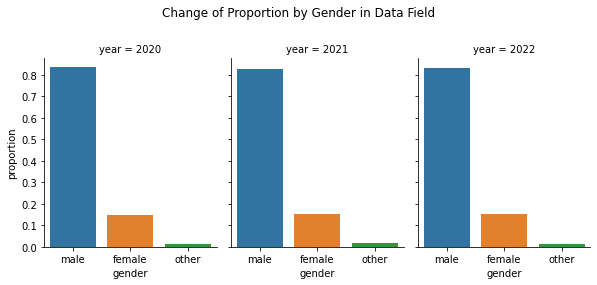

In [126]:
# Convert 'year' to int, sort it and then convert to str for plotting
merged_df['year'] = merged_df['year'].astype(int)
merged_df = merged_df.sort_values('year')
merged_df['year'] = merged_df['year'].astype(str)

# Get the proportions of each gender for each year
gender_proportions = merged_df.groupby('year')['gender'].value_counts(normalize=True).reset_index(name='proportion')

# Plot
sns.catplot(data=gender_proportions, x='gender', y='proportion', col='year', kind='bar', height=4, aspect=.7)
plt.subplots_adjust(top=0.8)
plt.suptitle('Change of Proportion by Gender in Data Field')
plt.show()


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


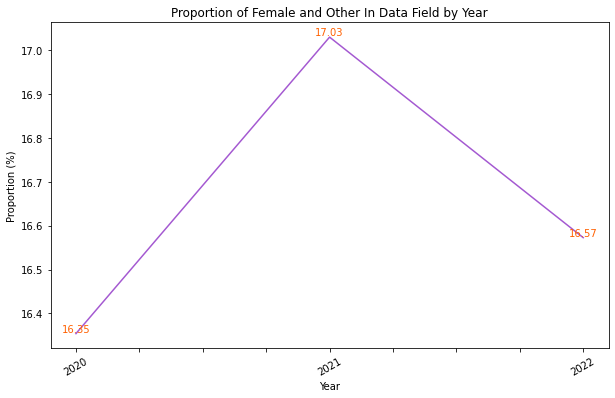

In [127]:
# Convert 'year' to str for proper sorting
merged_df['year'] = merged_df['year'].astype(str)

#Calculate the proportion of 'female' and 'other' for each year
merged_df['is_female_or_other'] = merged_df['gender'].apply(lambda x: 1 if x in ['female', 'other'] else 0)
proportion_female_other = merged_df.groupby('year')['is_female_or_other'].mean()

# Sort DataFrame by year
merged_df.sort_values(by='year', inplace=True)

# Create a numerical index for the years
year_index = range(len(proportion_female_other))

# Calculate the proportion of 'female' and 'other' for each year
proportion_female_other = merged_df.groupby('year')['is_female_or_other'].mean()*100

# Plot the proportions
plt.figure(figsize=(10, 6))
proportion_female_other.plot(kind='line', color = '#A459D1')
plt.xticks(rotation=30)  # to rotate x-axis labels for better visibility
plt.xlabel('Year')
plt.ylabel('Proportion (%)')
plt.title('Proportion of Female and Other In Data Field by Year')

# Add labels to each data point
for x, y in zip(year_index, proportion_female_other.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', color = '#FF6000')

plt.show()

## Visualisation - Q2

In [128]:
# Run this first to get a list of job titles
merged_df['current_job_title'].unique()

# There are too many titles to put all into the same graph. 
# The work around I have found is to create separate graphs for each title of interest.
# Based on the list, I think these ones would be worth running the below code for:
# 'Data Administrator'
# 'Data Analyst'
# 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)' --> combine this with 'Data Analyst' above
# 'Data Architect', 
# 'Data Engineer', 
# 'Data Scientist',
# 'Machine Learning Engineer',
# 'Machine Learning/ MLops Engineer',
# 'Software Engineer

array(['Data Engineer', 'Data Analyst', 'Data Scientist',
       'Software Engineer', 'Statistician', 'Product/Project Manager',
       'Machine Learning Engineer', 'Business Analyst',
       'DBA/Database Engineer', 'Program/Project Manager',
       'Product Manager', 'Developer Relations/Advocacy',
       'Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
       'Developer Advocate', 'Machine Learning/ MLops Engineer',
       'Data Architect', 'Data Administrator'], dtype=object)

### Tools Used by Job Title

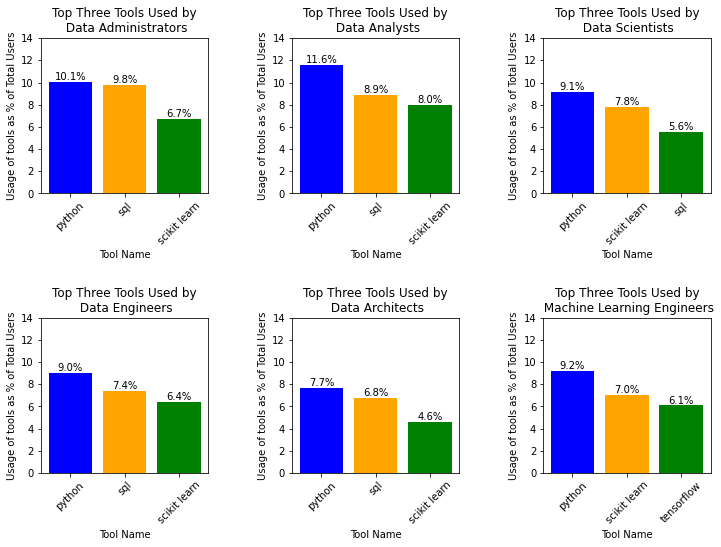

In [129]:
# 1. Define the list of job titles
selected_job_titles = ["Data Administrator", "Data Analyst", "Data Scientist", "Data Engineer", "Data Architect", "Machine Learning Engineer"]

# 2. Create the figure with 6 subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.subplots_adjust(hspace=0.8, wspace=0.5)

# 3. Iterate over each job title and create the subplot
for i, job_title in enumerate(selected_job_titles):
    filtered_df = merged_df[merged_df['current_job_title'] == job_title]
    
    # Step 3a: Calculate the count of regularly used tools
    tool_columns = [col for col in filtered_df.columns if col.startswith('tools_used_')]
    tool_usage_selected = filtered_df[tool_columns].sum().reset_index()
    tool_usage_selected.columns = ['Tool', 'Frequency']
    tool_usage_selected = tool_usage_selected.sort_values(by='Frequency', ascending=False)
    
    new_column_names = [col.replace("tools_used_", "").replace("_", " ") for col in tool_usage_selected['Tool']]
    tool_usage_selected['Tool'] = new_column_names
    tool_usage_selected['Frequency'] = tool_usage_selected['Frequency'].astype(int)
    top_three_tools = tool_usage_selected.nlargest(3, 'Frequency')
    
    # 3b. Store the top three tools for each job title
    top_three_tools_list = top_three_tools['Tool'].tolist()
    
    # 3c. Calculate the y axis values
    total_tool_usage = tool_usage_selected['Frequency'].sum()
    y_values = (tool_usage_selected.loc[tool_usage_selected['Tool'].isin(top_three_tools_list), 'Frequency'] / total_tool_usage) * 100
    
    # 3d. Create the bar plot
    ax = axes[i // 3, i % 3]
    colors = ['blue', 'orange', 'green']
    bars = ax.bar(top_three_tools_list, y_values, color=colors)
    
    # Add % values to the top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')
    
    # 3e. Set the axis labels, y-axis limit, and modify the title for long job titles
    ax.set_xlabel('Tool Name')
    ax.set_ylabel('Usage of tools as % of Total Users')
    ax.set_ylim(0, 14)
    ax.tick_params(axis='x', rotation=45)
    
    # Add an extra line in the titles
    max_title_length = 25
    if len(job_title) > max_title_length:
        title_lines = [job_title[j:j+max_title_length] for j in range(0, len(job_title), max_title_length)]
        title = '\n'.join(title_lines)
    else:
        title = job_title
    
    # Set the modified title
    ax.set_title(f'Top Three Tools Used by\n {title}s')

plt.show()


### Users of Top 3 Tools

In [130]:
# 1. Calculate the top 3 most frequently used tools across all job titles
tool_columns = [col for col in merged_df.columns if col.startswith('tools_used_')]
tool_usage_all = merged_df[tool_columns].sum().reset_index()
tool_usage_all.columns = ['Tool', 'Frequency']
tool_usage_all['Frequency'] = pd.to_numeric(tool_usage_all['Frequency'])  # Convert to numeric type
tool_usage_all = tool_usage_all.sort_values(by='Frequency', ascending=False)
top_three_tools_all = tool_usage_all.nlargest(3, 'Frequency')

print(top_three_tools_all)

                       Tool  Frequency
59        tools_used_python    20815.0
64  tools_used_scikit_learn    15644.0
66           tools_used_sql    13285.0


In [131]:
tool_job_titles = {}

for tool in top_three_tools_all['Tool']:
    tool_title_column = f'{tool}'
    job_titles = merged_df.loc[merged_df[tool_title_column] == 1, 'current_job_title'].tolist()
    unique_job_titles = set(job_titles)
    tool_job_titles[tool] = unique_job_titles

# Print the job titles for each tool
print("Job Titles for the Top 3 Tools:")
for tool, job_titles in tool_job_titles.items():
    print(f"Tool: {tool}")
    for title in job_titles:
        print(f"- {title}")
    print()

Job Titles for the Top 3 Tools:
Tool: tools_used_python
- DBA/Database Engineer
- Data Engineer
- Data Administrator
- Data Analyst (Business, Marketing, Financial, Quantitative, etc)
- Statistician
- Product Manager
- Developer Relations/Advocacy
- Machine Learning/ MLops Engineer
- Data Architect
- Software Engineer
- Program/Project Manager
- Product/Project Manager
- Business Analyst
- Developer Advocate
- Machine Learning Engineer
- Data Analyst
- Data Scientist

Tool: tools_used_scikit_learn
- DBA/Database Engineer
- Data Engineer
- Data Administrator
- Data Analyst (Business, Marketing, Financial, Quantitative, etc)
- Statistician
- Product Manager
- Developer Relations/Advocacy
- Machine Learning/ MLops Engineer
- Data Architect
- Software Engineer
- Program/Project Manager
- Business Analyst
- Product/Project Manager
- Developer Advocate
- Machine Learning Engineer
- Data Analyst
- Data Scientist

Tool: tools_used_sql
- DBA/Database Engineer
- Data Engineer
- Data Administrato

In [132]:
# Python usage composition

selected_job_titles = ['Product/Project Manager',
                       'Product Manager',
                       'Machine Learning/ MLops Engineer',
                       'Developer Relations/Advocacy',
                       'Teacher / professor',
                       'Data Administrator',
                       'Data Scientist',
                       'Data Analyst',
                       'DBA/Database Engineer',
                       'Manager (Program, Project, Operations, Executive-level, etc)',
                       'Program/Project Manager',
                       'Machine Learning Engineer',
                       'Developer Advocate',
                       'Business Analyst',
                       'Software Engineer',
                       'Data Engineer',
                       'Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
                       'Engineer (non-software)',
                       'Research Scientist',
                       'Statistician',
                       'Data Architect',
                       'Other']
tool_of_interest = 'tools_used_python'

# Calculate the frequency of tool usage for the selected job titles
tool_frequency = merged_df.loc[merged_df['current_job_title'].isin(selected_job_titles)]
tool_frequency = tool_frequency.groupby('current_job_title')[tool_of_interest].sum()

# Create a dictionary of tool usage frequencies for each job title
tool_frequency_dict = tool_frequency.to_dict()

print(tool_frequency_dict)

# Print the frequency of tool usage for each job title
# print("Frequency of tool usage for each job title:")
# for title, frequency in tool_frequency_dict.items():
#     print(f"{title}: {frequency}")

{'Business Analyst': 1052, 'DBA/Database Engineer': 198, 'Data Administrator': 39, 'Data Analyst': 2562, 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 1010, 'Data Architect': 70, 'Data Engineer': 1115, 'Data Scientist': 6854, 'Developer Advocate': 42, 'Developer Relations/Advocacy': 58, 'Machine Learning Engineer': 2112, 'Machine Learning/ MLops Engineer': 496, 'Product Manager': 210, 'Product/Project Manager': 421, 'Program/Project Manager': 574, 'Software Engineer': 3636, 'Statistician': 366}


In [133]:
# Scikit Learn usage composition

selected_job_titles = ['Product/Project Manager',
                       'Product Manager',
                       'Machine Learning/ MLops Engineer',
                       'Developer Relations/Advocacy',
                       'Teacher / professor',
                       'Data Administrator',
                       'Data Scientist',
                       'Data Analyst',
                       'DBA/Database Engineer',
                       'Manager (Program, Project, Operations, Executive-level, etc)',
                       'Program/Project Manager',
                       'Machine Learning Engineer',
                       'Developer Advocate',
                       'Business Analyst',
                       'Software Engineer',
                       'Data Engineer',
                       'Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
                       'Engineer (non-software)',
                       'Research Scientist',
                       'Statistician',
                       'Data Architect',
                       'Other']
tool_of_interest = 'tools_used_scikit_learn'

# Calculate the frequency of tool usage for the selected job titles
tool_frequency = merged_df.loc[merged_df['current_job_title'].isin(selected_job_titles)]
tool_frequency = tool_frequency.groupby('current_job_title')[tool_of_interest].sum()

# Create a dictionary of tool usage frequencies for each job title
tool_frequency_dict = tool_frequency.to_dict()

print(tool_frequency_dict)

{'Business Analyst': 720, 'DBA/Database Engineer': 125, 'Data Administrator': 26, 'Data Analyst': 1765, 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 637, 'Data Architect': 42, 'Data Engineer': 796, 'Data Scientist': 5880, 'Developer Advocate': 21, 'Developer Relations/Advocacy': 30, 'Machine Learning Engineer': 1602, 'Machine Learning/ MLops Engineer': 404, 'Product Manager': 133, 'Product/Project Manager': 299, 'Program/Project Manager': 399, 'Software Engineer': 2528, 'Statistician': 237}


In [134]:
# SQL Learn usage composition

selected_job_titles = ['Product/Project Manager',
                       'Product Manager',
                       'Machine Learning/ MLops Engineer',
                       'Developer Relations/Advocacy',
                       'Teacher / professor',
                       'Data Administrator',
                       'Data Scientist',
                       'Data Analyst',
                       'DBA/Database Engineer',
                       'Manager (Program, Project, Operations, Executive-level, etc)',
                       'Program/Project Manager',
                       'Machine Learning Engineer',
                       'Developer Advocate',
                       'Business Analyst',
                       'Software Engineer',
                       'Data Engineer',
                       'Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
                       'Engineer (non-software)',
                       'Research Scientist',
                       'Statistician',
                       'Data Architect',
                       'Other']
tool_of_interest = 'tools_used_sql'

# Calculate the frequency of tool usage for the selected job titles
tool_frequency = merged_df.loc[merged_df['current_job_title'].isin(selected_job_titles)]
tool_frequency = tool_frequency.groupby('current_job_title')[tool_of_interest].sum()

# Create a dictionary of tool usage frequencies for each job title
tool_frequency_dict = tool_frequency.to_dict()

print(tool_frequency_dict)

{'Business Analyst': 772, 'DBA/Database Engineer': 218, 'Data Administrator': 38, 'Data Analyst': 1964, 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 792, 'Data Architect': 62, 'Data Engineer': 911, 'Data Scientist': 4192, 'Developer Advocate': 22, 'Developer Relations/Advocacy': 33, 'Machine Learning Engineer': 735, 'Machine Learning/ MLops Engineer': 205, 'Product Manager': 117, 'Product/Project Manager': 254, 'Program/Project Manager': 357, 'Software Engineer': 2422, 'Statistician': 191}


In [135]:
# top_jobs = {}
# specified_tools = ['Python', 'Scikit Learn', 'SQL']

# for tool in specified_tools:
#     top_jobs[tool] = sorted(q3_combined_dict[tool].items(), key=lambda x: x[1], reverse=True)[:3]

# for tool, jobs in top_jobs.items():
#     top_titles = [title for title, _ in jobs]
#     print(f"Top job titles for {tool}: {top_titles}")

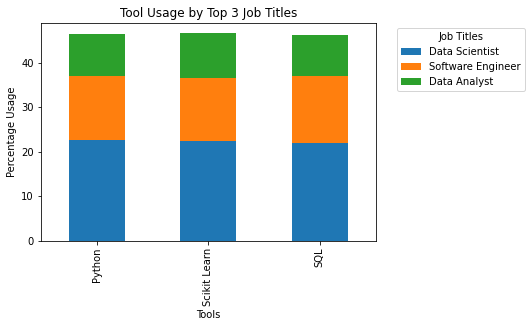

In [136]:
# Plot

python_dict = {'Business Analyst': 1164, 'DBA/Database Engineer': 222, 'Data Administrator': 47, 'Data Analyst': 2630, 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 1022, 'Data Architect': 79, 'Data Engineer': 1039, 'Data Scientist': 6242, 'Developer Advocate': 38, 'Developer Relations/Advocacy': 67, 'Engineer (non-software)': 305, 'Machine Learning Engineer': 1907, 'Machine Learning/ MLops Engineer': 434, 'Manager (Program, Project, Operations, Executive-level, etc)': 561, 'Other': 3173, 'Product Manager': 214, 'Product/Project Manager': 453, 'Program/Project Manager': 617, 'Research Scientist': 2412, 'Software Engineer': 3985, 'Statistician': 498, 'Teacher / professor': 599}
scikit_learn_dict = {'Business Analyst': 901, 'DBA/Database Engineer': 175, 'Data Administrator': 37, 'Data Analyst': 2047, 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 778, 'Data Architect': 55, 'Data Engineer': 778, 'Data Scientist': 4558, 'Developer Advocate': 34, 'Developer Relations/Advocacy': 48, 'Engineer (non-software)': 211, 'Machine Learning Engineer': 1378, 'Machine Learning/ MLops Engineer': 309, 'Manager (Program, Project, Operations, Executive-level, etc)': 420, 'Other': 2302, 'Product Manager': 150, 'Product/Project Manager': 352, 'Program/Project Manager': 453, 'Research Scientist': 1742, 'Software Engineer': 2901, 'Statistician': 353, 'Teacher / professor': 440}
sql_dict = {'Business Analyst': 656, 'DBA/Database Engineer': 132, 'Data Administrator': 29, 'Data Analyst': 1496, 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 596, 'Data Architect': 38, 'Data Engineer': 614, 'Data Scientist': 3508, 'Developer Advocate': 28, 'Developer Relations/Advocacy': 43, 'Engineer (non-software)': 166, 'Machine Learning Engineer': 1094, 'Machine Learning/ MLops Engineer': 241, 'Manager (Program, Project, Operations, Executive-level, etc)': 341, 'Other': 1849, 'Product Manager': 118, 'Product/Project Manager': 252, 'Program/Project Manager': 343, 'Research Scientist': 1371, 'Software Engineer': 2375, 'Statistician': 286, 'Teacher / professor': 361}

# Convert into % usage
python_total = sum(python_dict.values())
scikit_learn_total = sum(scikit_learn_dict.values())
sql_total = sum(sql_dict.values())

# Convert counts to percentages
python_dict = {job: count / python_total * 100 for job, count in python_dict.items()}
scikit_learn_dict = {job: count / scikit_learn_total * 100 for job, count in scikit_learn_dict.items()}
sql_dict = {job: count / sql_total * 100 for job, count in sql_dict.items()}

# Combine the dictionaries into a single dictionary
q3_combined_dict = {'Python': python_dict, 'Scikit Learn': scikit_learn_dict, 'SQL': sql_dict}

# Identify top 3 titles in each of the 3 tools
top_jobs = {}
for tool, tool_dict in q3_combined_dict.items():
    # Exclude 'Other' from the sorting and selection of top jobs
    top_jobs[tool] = sorted({k: v for k, v in tool_dict.items() if k != 'Other'}, key=tool_dict.get, reverse=True)[:3]

# Identify top 3 titles (excluding 'Other') in each of the 3 tools
top_jobs = {}
for tool, tool_dict in q3_combined_dict.items():
    # Exclude 'Other' from the sorted list of jobs
    sorted_jobs = sorted({job: count for job, count in tool_dict.items() if job != 'Other'}, key=tool_dict.get, reverse=True)
    top_jobs[tool] = sorted_jobs[:3]  # Select the top 3 jobs

import matplotlib.pyplot as plt
import pandas as pd

#create a df
q3_plot_df = pd.DataFrame(q3_combined_dict)

# Filter dataframe to only include top 3 job titles for each tool
filtered_q3_plot_df = pd.DataFrame()
for tool in q3_combined_dict:
  filtered_q3_plot_df = pd.concat([filtered_q3_plot_df, q3_plot_df.loc[top_jobs[tool], tool]], axis=1)

# Stacked bar graph
ax = filtered_q3_plot_df.T.plot(kind='bar', stacked=True)

plt.xlabel('Tools')
plt.ylabel('Percentage Usage')
plt.title('Tool Usage by Top 3 Job Titles')

# Update the position of the legend
plt.legend(title="Job Titles", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## Visualisation - Q3

In [137]:
# List for variables

variables = ['age', 'gender', 'continent', 'company_size', 'current_job_title', 'highest_education', 'team_size', 'years_writing_code']

# Map each variable to its order
orders = {'age': age_order, 'team_size': team_size_order, 'years_writing_code': years_writing_code_order, 'company_size': company_size_order, 'highest_education': highest_education_order}

rotate_labels = ['continent', 'current_job_title', 'highest_education']

### Bar Charts and Pie Charts

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  del sys.path[0]
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



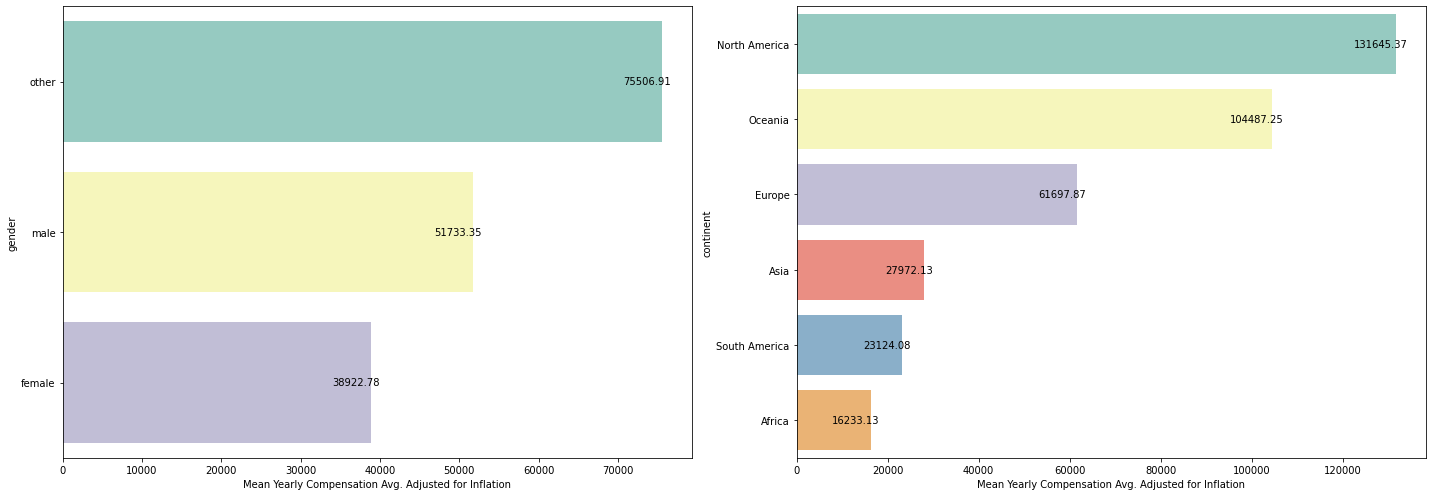

In [138]:
# Define the desired order for gender and continent
gender_order = ['other', 'male', 'female']
continent_order = ['North America', 'Oceania', 'Europe', 'Asia', 'South America', 'Africa']

# Calculate the mean yearly compensation for each gender and continent
gender_mean = merged_df.groupby('gender')['yearly_compensation_avg_inflation'].mean()
continent_mean = merged_df.groupby('continent')['yearly_compensation_avg_inflation'].mean()

# Plot the horizontal bar plots with ordered categories
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

# Gender
sns.barplot(y='gender', x='yearly_compensation_avg_inflation', data=merged_df, ax=axs[0], palette='Set3', ci=None, order=gender_order)
axs[0].set_xlabel('Mean Yearly Compensation Avg. Adjusted for Inflation')

# Add data labels to the bar chart
for bar, value in zip(axs[0].patches, gender_mean.values):
    width = bar.get_width()
    axs[0].annotate(format(width, '.2f'),
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(-15, 0),  # Adjust the xytext to position the labels inside the bars
                    textcoords='offset points',
                    ha='center',
                    va='center')

# Continent
sns.barplot(y='continent', x='yearly_compensation_avg_inflation', data=merged_df, ax=axs[1], palette='Set3', ci=None, order=continent_order)
axs[1].set_xlabel('Mean Yearly Compensation Avg. Adjusted for Inflation')

# Add data labels to the bar chart
for bar, value in zip(axs[1].patches, continent_mean.values):
    width = bar.get_width()
    axs[1].annotate(format(width, '.2f'),
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(-15, 0), 
                    textcoords='offset points',
                    ha='center',
                    va='center')

plt.tight_layout()
plt.show()

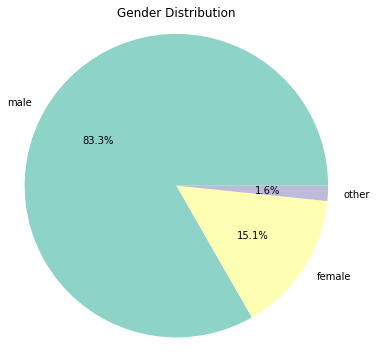

In [139]:
# Gender Pie Chart
# Calculate gender counts
gender_counts = merged_df['gender'].value_counts()

# Set the palette
palette = sns.color_palette("Set3")

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=palette)
plt.title("Gender Distribution")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

### Coding Experience Mean

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  """


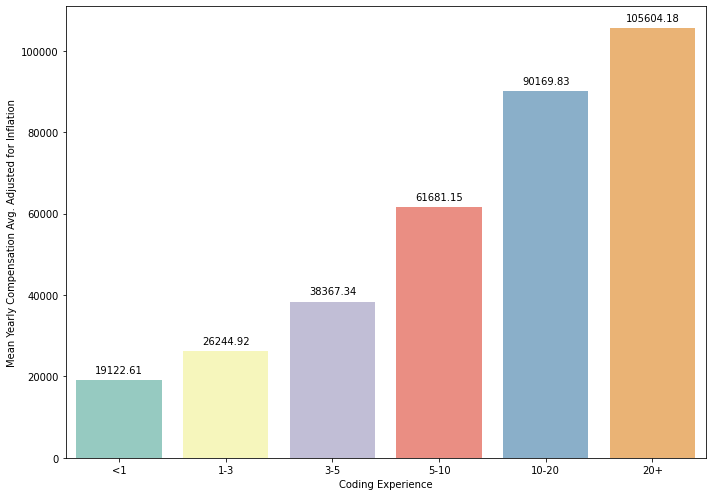

In [140]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7))

var = variables[7]  # Years writing code
years_mean = merged_df.groupby(var)['yearly_compensation_avg_inflation'].mean()
sns.barplot(x=var, y='yearly_compensation_avg_inflation', data=merged_df, ax=axs, palette='Set3', ci=None, order=orders.get(var))
axs.set_xlabel(var)
axs.set_ylabel('Mean Yearly Compensation Avg. Adjusted for Inflation')
axs.set_xlabel('Coding Experience')

# Add data labels to the bar chart
for bar, value in zip(axs.patches, years_mean.values):
    height = bar.get_height()
    axs.annotate(format(height, '.2f'),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  
                 textcoords='offset points',
                 ha='center',
                 va='bottom')

plt.tight_layout()
plt.show()

### Age Box Plot

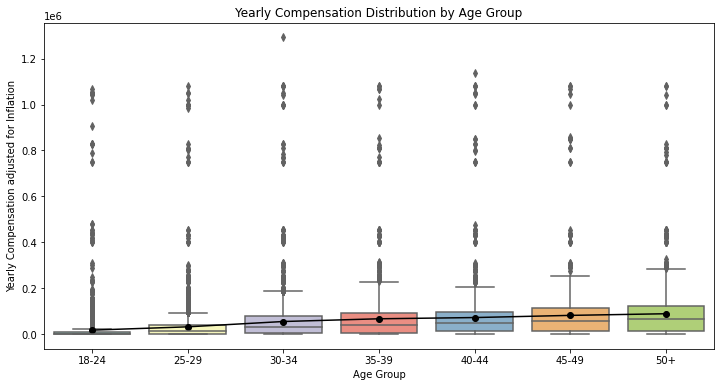

In [141]:
# Set the palette
palette = sns.color_palette("Set3")

var = variables[0]

# Calculate means and medians
means = merged_df.groupby(var)['yearly_compensation_avg_inflation'].mean().values

# Plot the boxplot and line chart with the palette
plt.figure(figsize=(12, 6))
sns.boxplot(x=var, y='yearly_compensation_avg_inflation', data=merged_df, palette=palette, order=orders.get(var))
plt.plot(np.arange(len(means)), means, marker='o', linestyle='-', color='black')

# Set plot title and labels
plt.title("Yearly Compensation Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Yearly Compensation adjusted for Inflation")
plt.show()

### Interactive Proportion Plot: Gender & Continent

In [171]:
# Interactive Gender Plot 
# Create a mapping for salary categories and their actual buckets
salary_mapping = {'0': '0-25k', '1': '25k-60k', '2': '60k-90k', '3': '90k-125k', '4': '125k+'}
salary_order = ['0-25k', '25k-60k', '60k-90k', '90k-125k', '125k+']

# Group the data by gender and salary bucket and calculate the count
grouped = merged_df.groupby(['gender', 'yearly_compensation_encoded']).size().reset_index(name='count')

# Map the encoded salary category to the actual categories
grouped['yearly_compensation_encoded'] = grouped['yearly_compensation_encoded'].map(salary_mapping)
grouped['yearly_compensation_encoded'] = pd.Categorical(grouped['yearly_compensation_encoded'], categories=salary_order, ordered=True)

# Pivot the data to have salary buckets as the columns and gender as the index
pivot_df = grouped.pivot(index='gender', columns='yearly_compensation_encoded', values='count')

# Calculate the proportion for each salary bucket in each gender
proportions = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
fig = px.bar(
    proportions,
    x=proportions.index,
    y=proportions.columns,
    labels={'value': 'Proportion (%)', 'gender': 'Gender'},
    title='Proportion of Salary Categories for Each Gender',
    hover_data={'value': True},
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Set2,
    width=800,
    height=600
)

# Customize the legend
fig.update_layout(legend_title_text='Salary Category')

# Rotate x-axis labels for better visibility if needed
fig.update_xaxes(tickangle=-45)

# Show the figure
fig.show()


In [ ]:
# Interactive Continent Plot
# Create a mapping for salary categories and their actual buckets
salary_mapping = {'0': '0-25k', '1': '25k-60k', '2': '60k-90k', '3': '90k-125k', '4': '125k+'}
salary_order = ['0-25k', '25k-60k', '60k-90k', '90k-125k', '125k+']

# Group the data by continent and salary bucket and calculate the count
grouped = merged_df.groupby(['continent', 'yearly_compensation_encoded']).size().reset_index(name='count')

# Map the encoded salary category to the actual categories
grouped['yearly_compensation_encoded'] = grouped['yearly_compensation_encoded'].map(salary_mapping)
grouped['yearly_compensation_encoded'] = pd.Categorical(grouped['yearly_compensation_encoded'], categories=salary_order, ordered=True)

# Pivot the data to have salary buckets as the columns and continentas the index
pivot_df = grouped.pivot(index='continent', columns='yearly_compensation_encoded', values='count')

# Calculate the proportion for each salary bucket in each continent
proportions = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
fig = px.bar(
    proportions,
    x=proportions.index,
    y=proportions.columns,
    labels={'value': 'Proportion (%)', 'continent': 'Continent'},
    title='Proportion of Salary Categories for Each Year',
    hover_data={'value': True},
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Set2,
    width=800,
    height=600
)

# Customize the legend
fig.update_layout(legend_title_text='Salary Category')

# Rotate x-axis labels for better visibility if needed
fig.update_xaxes(tickangle=-45)

# Show the figure
fig.show()

# Machine Learning - Q4


## Model

In [ ]:
# Define the ordered categorical data type
cat_type = CategoricalDtype(categories=['0', '1', '2', '3', '4'], ordered=True)
merged_df["yearly_compensation_encoded"] = merged_df["yearly_compensation_encoded"].astype(cat_type)
merged_df['yearly_compensation_encoded'].dtype

In [ ]:
#fix object vars to categorical type
object_vars = ['gender_male', 'gender_female', 'gender_other',
    'continent_africa', 'continent_asia','continent_europe', 'continent_north america', 'continent_oceania', 'continent_south america', 
                  'years_writing_code_encoded', 'highest_education_encoded','company_size_encoded', 'team_size_encoded',
                            'current_job_title_Business Analyst','current_job_title_Data Administrator', 'current_job_title_Data Analyst', 
                                     'current_job_title_Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
                                     'current_job_title_Data Architect', 'current_job_title_Data Engineer', 
                                     'current_job_title_Data Scientist', 'current_job_title_Developer Advocate', 
                                     'current_job_title_Developer Relations/Advocacy', 
                                     'current_job_title_Machine Learning Engineer',
                                     'current_job_title_Machine Learning/ MLops Engineer',
                                     'current_job_title_Product Manager', 
                                     'current_job_title_Product/Project Manager', 
                                     'current_job_title_Program/Project Manager', 
                                     'current_job_title_Research Scientist', 'current_job_title_Statistician',
                                     'current_job_title_Software Engineer', 'current_job_title_DBA/Database Engineer',
                                    'tools_used_alibaba_cloud', 'tools_used_amazon_athena', 
                                     'tools_used_amazon_dynamodb', 'tools_used_amazon_forecast', 'tools_used_amazon_redshift',
                                     'tools_used_amazon_rekognition', 'tools_used_amazon_sagemaker', 'tools_used_amazon_web_services_aws_', 
                                     'tools_used_auto_keras', 'tools_used_auto_ml', 'tools_used_auto_sklearn', 
                                     'tools_used_automated_data_augmentation_e_g_imgaug_albumentations_', 
                                     'tools_used_automated_feature_engineering_selection_e_g_tpot_boruta_py_', 
                                     'tools_used_automated_hyperparameter_tuning_e_g_hyperopt_ray_tune_vizier_', 
                                     'tools_used_automated_model_architecture_searches_e_g_darts_enas_', 
                                     'tools_used_automated_model_selection_e_g_auto_sklearn_xcessiv_', 
                                     'tools_used_automation_of_full_ml_pipelines_e_g_google_automl_h2o_driverless_ai_', 
                                     'tools_used_azure_cognitive_services', 'tools_used_azure_machine_learning_studio', 
                                     'tools_used_bash', 'tools_used_c', 'tools_used_c_', 'tools_used_caret', 'tools_used_catboost', 
                                     'tools_used_databricks_automl', 'tools_used_datarobot_automl', 'tools_used_fast_ai', 
                                     'tools_used_google_cloud_ai_platform_google_cloud_ml_engine', 'tools_used_google_cloud_automl', 
                                     'tools_used_google_cloud_bigquery', 'tools_used_google_cloud_firestore', 
                                     'tools_used_google_cloud_natural_language', 'tools_used_google_cloud_platform_gcp_', 
                                     'tools_used_google_cloud_sql', 'tools_used_google_cloud_video_ai', 'tools_used_google_cloud_vision_ai', 
                                     'tools_used_h2o_', 'tools_used_h2o_driverless_ai', 'tools_used_ibm_cloud_red_hat', 'tools_used_ibm_db', 
                                     'tools_used_java', 'tools_used_javascript', 'tools_used_jax', 'tools_used_julia',
                                     'tools_used_keras', 'tools_used_lightgbm', 'tools_used_matlab', 'tools_used_microsoft_access', 
                                     'tools_used_microsoft_azure', 'tools_used_microsoft_azure_data_lake_storage',
                                     'tools_used_microsoft_sql_server', 'tools_used_mlbox', 'tools_used_mongodb', 'tools_used_mxnet', 
                                     'tools_used_mysql', 'tools_used_oracle_cloud', 'tools_used_oracle_database', 'tools_used_postgresql',
                                     'tools_used_prophet', 'tools_used_python', 'tools_used_pytorch', 'tools_used_r', 
                                     'tools_used_salesforce_cloud', 'tools_used_sap_cloud', 'tools_used_scikit_learn', 
                                     'tools_used_snowflake', 'tools_used_sql', 'tools_used_sqlite', 'tools_used_swift', 
                                     'tools_used_tencent_cloud', 'tools_used_tensorflow', 'tools_used_tidymodels', 'tools_used_tpot', 
                                     'tools_used_vmware_cloud', 'tools_used_xcessiv', 'tools_used_xgboost', 'year', 
                                     'years_machine_learning_encoded','tools_used_alteryx', 'tools_used_amazon_aurora', 
                                     'tools_used_amazon_elastic_compute_cloud_ec2_', 'tools_used_amazon_rds', 
                                     'tools_used_amazon_sagemaker_autopilot', 'tools_used_azure_automated_machine_learning',
                                     'tools_used_contextualized_embeddings_elmo_cove_', 'tools_used_databricks', 'tools_used_dataiku',
                                     'tools_used_datarobot', 'tools_used_encoder_decorder_models_seq2seq_vanilla_transformers_', 
                                     'tools_used_google_cloud_bigtable', 'tools_used_google_cloud_compute_engine', 
                                     'tools_used_google_cloud_spanner', 'tools_used_google_cloud_vertex_ai', 'tools_used_huggingface', 
                                     'tools_used_microsoft_azure_cosmos_db', 'tools_used_microsoft_azure_sql_database', 
                                     'tools_used_microsoft_azure_virtual_machines', 'tools_used_pytorch_lightning', 
                                     'tools_used_rapidminer', 'tools_used_transformer_language_models_gpt_3_bert_xlnet_etc_', 
                                     'tools_used_word_embeddings_vectors_glove_fasttext_word2vec_', 'tools_used_c3_ai',
                                     'tools_used_domino_data_lab', 'tools_used_encoder_decoder_models_seq2seq_vanilla_transformers_', 
                                     'tools_used_go', 'tools_used_h2o_ai_cloud', 'tools_used_huawei_cloud', 'tools_used_php',
                                    'industry_Accounting/Finance',
                                     'industry_Broadcasting/Communications', 'industry_Computers/Technology',
                                     'industry_Energy/Mining', 'industry_Government/Public Service', 
                                     'industry_Hospitality/Entertainment/Sports', 'industry_Insurance/Risk Assessment', 
                                     'industry_Manufacturing/Fabrication', 'industry_Marketing/CRM',
                                     'industry_Medical/Pharmaceutical', 'industry_Military/Security/Defense', 
                                     'industry_Non-profit/Service', 'industry_Online Business/Internet-based Sales', 
                                     'industry_Online Service/Internet-based Services',
                                     'industry_Retail/Sales', 'industry_Shipping/Transportation',
                                    'year_2022','year_2021','year_2020']
for column in object_vars:
    if column in merged_df.columns:
        merged_df[column] = merged_df[column].astype('int')
    else:
        print(f"Column '{column}' does not exist in the DataFrame.")

# MODEL 1

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.model_selection import train_test_split

# Define the model
explanatory_vars = ['gender_female', 'gender_other', 'continent_africa', 'continent_asia',
                    'continent_north america', 'continent_oceania', 'continent_south america',
                    'highest_education_encoded', 'years_writing_code_encoded',
                     'company_size_encoded', 'team_size_encoded',
                    'current_job_title_Data Administrator',
                    'current_job_title_Data Analyst',
                    'current_job_title_Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
                    'current_job_title_Data Architect', 'current_job_title_Data Engineer',
                    'current_job_title_Data Scientist', 'current_job_title_Developer Advocate',
                    'current_job_title_Developer Relations/Advocacy',
                    'current_job_title_Machine Learning Engineer',
                    'current_job_title_Machine Learning/ MLops Engineer', 'current_job_title_Product Manager',
                    'current_job_title_Product/Project Manager', 'current_job_title_Program/Project Manager',
                    'current_job_title_Software Engineer', 'year_2022', 'year_2021']
target_var = 'yearly_compensation_encoded'

# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(merged_df[explanatory_vars], merged_df[target_var],
                                                    test_size=0.2, random_state=42)

# Create Model 
mod_prob = OrderedModel(y_train, X_train, distr='logit')

# Fit the model
res_log = mod_prob.fit(method='bfgs')

summary_str = res_log.summary().as_text()

# Save the model summary to a csv file
with open('logistic_regression_summary.csv', 'w') as f:
    f.write(summary_str)

In [ ]:
# Model summary
print(res_log.summary())

In [ ]:
# Check multicollinearity
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create DF with the independent vars
X = X_train.copy() 

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

In [ ]:
# Check for multicollinearity

df = X_train.copy()
df[target_var] = y_train

# Calculate the correlation matrix
corr_matrix = df[explanatory_vars + [target_var]].corr()

# Create heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, cbar=True, linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()

# Model 1 with pseudo r2

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.model_selection import train_test_split
import numpy as np

# Define the model
explanatory_vars = ['gender_female', 'gender_other', 'continent_africa', 'continent_asia',
                    'continent_north america', 'continent_oceania', 'continent_south america',
                    'highest_education_encoded', 'years_writing_code_encoded',
                    'company_size_encoded', 'team_size_encoded',
                    'current_job_title_Data Administrator',
                    'current_job_title_Data Analyst',
                    'current_job_title_Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
                    'current_job_title_Data Architect', 'current_job_title_Data Engineer',
                    'current_job_title_Data Scientist', 'current_job_title_Developer Advocate',
                    'current_job_title_Developer Relations/Advocacy',
                    'current_job_title_Machine Learning Engineer',
                    'current_job_title_Machine Learning/ MLops Engineer', 'current_job_title_Product Manager',
                    'current_job_title_Product/Project Manager', 'current_job_title_Program/Project Manager',
                    'current_job_title_Software Engineer', 'year_2022', 'year_2021']
target_var = 'yearly_compensation_encoded'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_df[explanatory_vars], merged_df[target_var],
                                                    test_size=0.2, random_state=42)

# create the model
mod_prob = OrderedModel(y_train, X_train, distr='logit')

# Fit the model
res_log = mod_prob.fit(method='bfgs')

# nagelkerke's pseudo R-squared
nobs = len(y_train)
log_likelihood = res_log.llf
null_log_likelihood = nobs * np.log(1 / len(np.unique(y_train)))
max_log_likelihood = log_likelihood if log_likelihood > null_log_likelihood else null_log_likelihood
pseudo_r2_nagelkerke = (1 - np.exp(-2 * (max_log_likelihood - log_likelihood) / nobs)) ** 2


print(res_log.summary())

print("Nagelkerke's Pseudo R-squared:", pseudo_r2_nagelkerke)

# Appendix (Visualizations Not in Report)

## Explorative Data Analysis

In [125]:
# general info
merged_df.describe(include='all')

,age,company_size,country,current_job_title,employer_use_ml,gender,highest_education,learning_platforms_cloud_certification_programs_direct_from_aws_azure_gcp_or_similar_,learning_platforms_coursera,learning_platforms_datacamp,...,industry_Military/Security/Defense,industry_Non-profit/Service,industry_Online Business/Internet-based Sales,industry_Online Service/Internet-based Services,industry_Other,industry_Retail/Sales,industry_Shipping/Transportation,industry_nan,yearly_compensation_avg,yearly_compensation_avg_inflation
count,23805,23805,23805,23805,23805,23805,23805,23805.0,23805.0,23805.0,...,23805,23805,23805,23805,23805,23805,23805,23805,23805,2.380500e+04
unique,7,5,69,17,5,3,8,2.0,2.0,2.0,...,2,2,2,2,2,2,2,2,27,NaN
top,25-29,0-49,India,Data Scientist,No/I do not know,male,Master’s degree,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,499.5,NaN
freq,5485,7560,5779,7204,6960,19826,11297,21592.0,12146.0,18790.0,...,23681,23503,23596,23038,22783,23140,23502,15966,4640,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.018374e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.012559e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.995000e+02
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.797500e+03
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.839750e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.833490e+04


In [126]:
print(merged_df.head(10))

      age company_size                   country        current_job_title   
0   30-34      10,000+  United States of America            Data Engineer  \
1   35-39   1000-9,999                 Argentina        Software Engineer   
2   30-34      250-999  United States of America           Data Scientist   
3   35-39   1000-9,999                   Germany           Data Scientist   
5   30-34         0-49                    Canada            Data Engineer   
7   18-24       50-249                     India             Statistician   
8   30-34       50-249                    Russia           Data Scientist   
9     50+      250-999                    Canada  Product/Project Manager   
10  35-39         0-49              South Africa             Data Analyst   
11    50+       50-249  United States of America        Software Engineer   

                                                                            employer_use_ml   
0    We have well established ML methods (i.e., models in

In [127]:
# Print new column indexes & names
for i, col_name in enumerate(merged_df.columns):
    print(f'Index: {i}, Column Name: {col_name}')

Index: 0, Column Name: age
Index: 1, Column Name: company_size
Index: 2, Column Name: country
Index: 3, Column Name: current_job_title
Index: 4, Column Name: employer_use_ml
Index: 5, Column Name: gender
Index: 6, Column Name: highest_education
Index: 7, Column Name: learning_platforms_cloud_certification_programs_direct_from_aws_azure_gcp_or_similar_
Index: 8, Column Name: learning_platforms_coursera
Index: 9, Column Name: learning_platforms_datacamp
Index: 10, Column Name: learning_platforms_edx
Index: 11, Column Name: learning_platforms_fast_ai
Index: 12, Column Name: learning_platforms_kaggle_learn_courses
Index: 13, Column Name: learning_platforms_linkedin_learning
Index: 14, Column Name: learning_platforms_udacity
Index: 15, Column Name: learning_platforms_udemy
Index: 16, Column Name: learning_platforms_university_courses_resulting_in_a_university_degree_
Index: 17, Column Name: team_size
Index: 18, Column Name: years_writing_code
Index: 19, Column Name: tools_used_alibaba_cloud

### Relationship Between Learning Platforms and Compensation

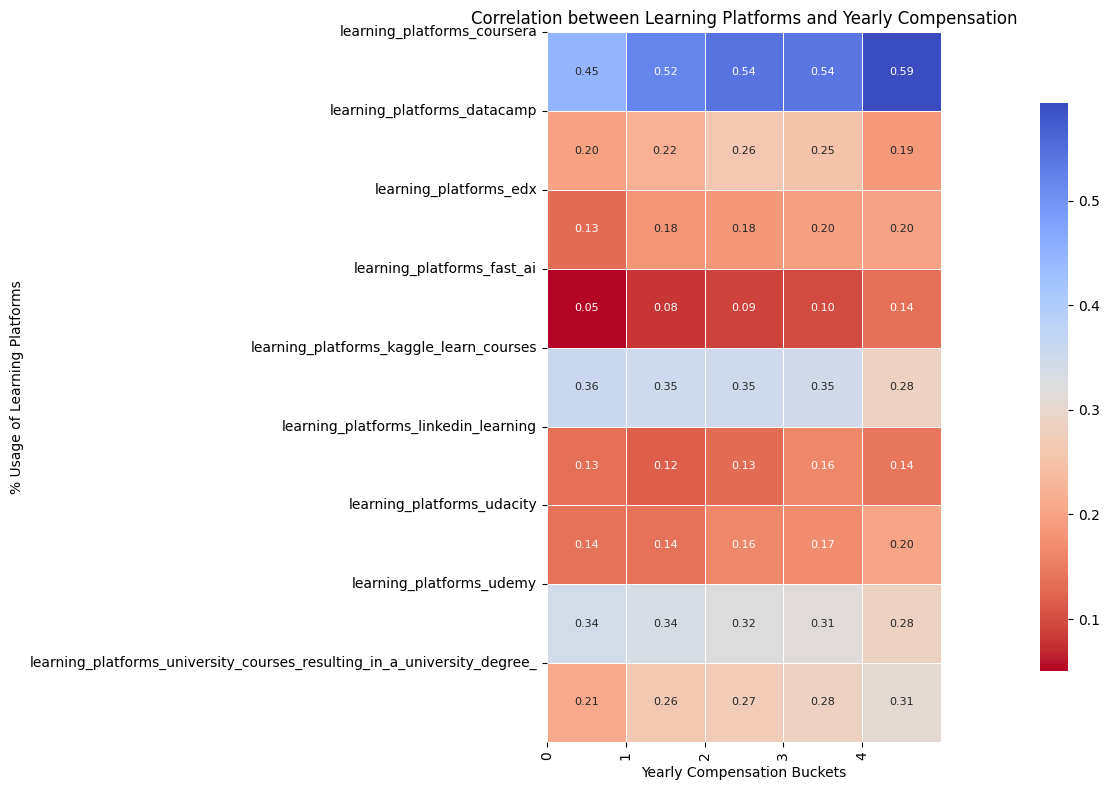

In [130]:
# Relationship between Learning Platforms and Compensation
# Select the learning platform columns
learning_platform_columns = [
    'learning_platforms_coursera',
    'learning_platforms_datacamp',
    'learning_platforms_edx',
    'learning_platforms_fast_ai',
    'learning_platforms_kaggle_learn_courses',
    'learning_platforms_linkedin_learning',
    'learning_platforms_udacity',
    'learning_platforms_udemy',
    'learning_platforms_university_courses_resulting_in_a_university_degree_'
]

# Convert the learning platform columns to integer data type
merged_df[learning_platform_columns] = merged_df[learning_platform_columns].astype('int')

# Group the data by yearly compensation and calculate the mean usage of each learning platform
grouped_data = merged_df.groupby('yearly_compensation_encoded')[learning_platform_columns].mean()

# Transpose the data to have learning platforms as columns and yearly compensation as rows
grouped_data = grouped_data.transpose()

plt.figure(figsize=(20, 8))
sns.heatmap(grouped_data, cmap='coolwarm_r', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 8}, cbar_kws={"shrink": 0.8}, square=True)
plt.title('Correlation between Learning Platforms and Yearly Compensation')
plt.xlabel('Yearly Compensation Buckets')
plt.ylabel('% Usage of Learning Platforms')
plt.xticks(ticks=range(len(grouped_data.columns)), labels=grouped_data.columns, rotation=90)
plt.yticks(ticks=range(len(grouped_data.index)), labels=grouped_data.index)
plt.tight_layout()
plt.show()

### Count Plots

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  """
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  # Remove the CWD from sys.path while we load stuff.


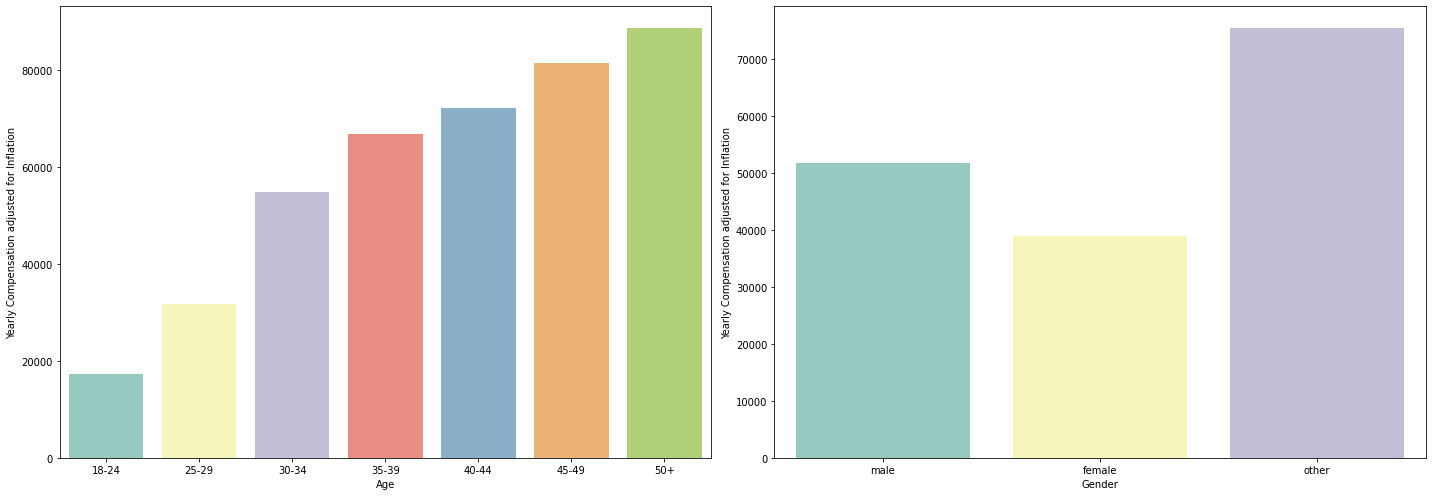

In [142]:
# Age & Gender
fig, axs = plt.subplots(1, 2, figsize=(20,7))

var = variables[0]
sns.barplot(x=var, y="yearly_compensation_avg_inflation", data=merged_df, ax=axs[0], palette="Set3", ci=None, order=orders.get(var))
if var in rotate_labels:
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

var = variables[1]
sns.barplot(x=var, y="yearly_compensation_avg_inflation", data=merged_df, ax=axs[1], palette="Set3", ci=None, order=orders.get(var))
if var in rotate_labels:
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
    
axs[0].set_ylabel("Yearly Compensation adjusted for Inflation")
axs[1].set_ylabel("Yearly Compensation adjusted for Inflation")
axs[0].set_xlabel("Age")
axs[1].set_xlabel("Gender")
    
plt.tight_layout()
plt.show()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  """
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  # Remove the CWD from sys.path while we load stuff.


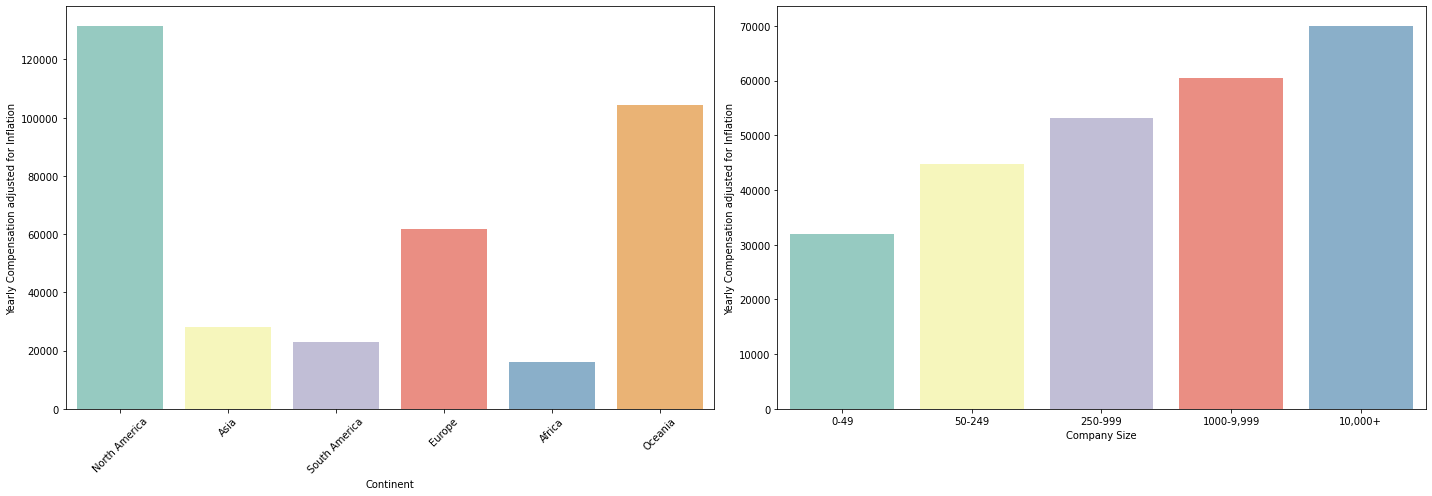

In [143]:
# Continent & Company Size
fig, axs = plt.subplots(1, 2, figsize=(20,7))

var = variables[2]  # Continent
sns.barplot(x=var, y="yearly_compensation_avg_inflation", data=merged_df, ax=axs[0], palette="Set3", ci=None, order=orders.get(var))
if var in rotate_labels:
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

var = variables[3]  # Company Size
sns.barplot(x=var, y="yearly_compensation_avg_inflation", data=merged_df, ax=axs[1], palette="Set3", ci=None, order=orders.get(var))
if var in rotate_labels:
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
    
axs[0].set_ylabel("Yearly Compensation adjusted for Inflation")
axs[1].set_ylabel("Yearly Compensation adjusted for Inflation")
axs[0].set_xlabel("Continent")
axs[1].set_xlabel("Company Size")

plt.tight_layout()
plt.show()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  """
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  # Remove the CWD from sys.path while we load stuff.


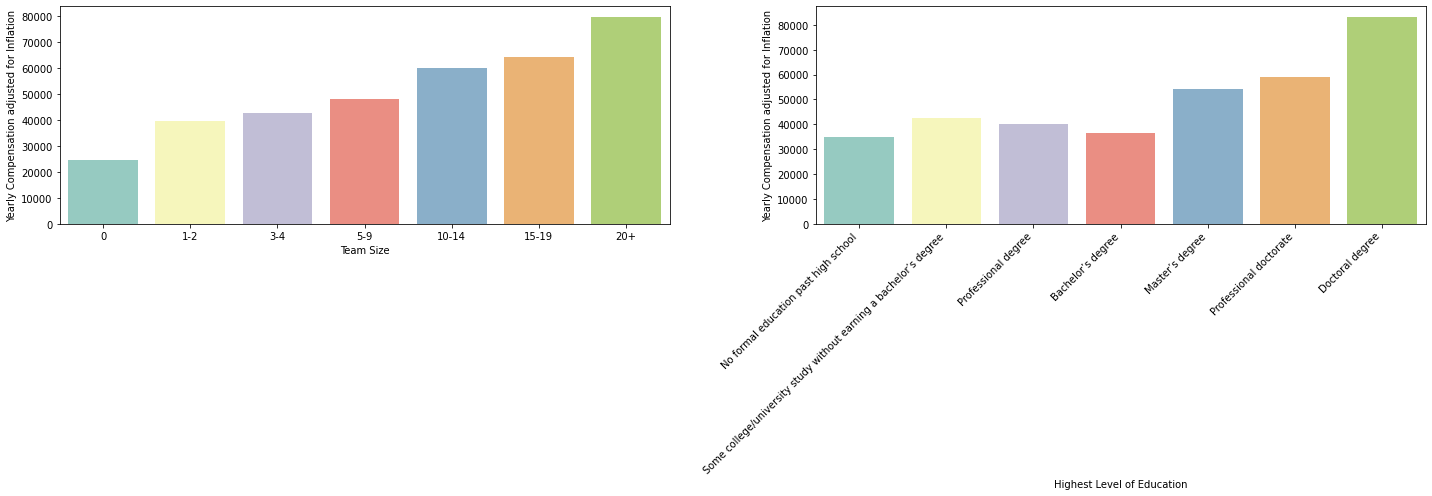

In [144]:
# Education & Team Size
fig, axs = plt.subplots(1, 2, figsize=(20,7))

var = variables[6]  # Team Size
sns.barplot(x=var, y="yearly_compensation_avg_inflation", data=merged_df, ax=axs[0], palette="Set3", ci=None, order=orders.get(var))
if var in rotate_labels:
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right', va='top')  # Adjust alignment

var = variables[5]  # Education
sns.barplot(x=var, y="yearly_compensation_avg_inflation", data=merged_df, ax=axs[1], palette="Set3", ci=None, order=orders.get(var))
if var in rotate_labels:
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right', va='top')  # Adjust alignment
    
axs[0].set_ylabel("Yearly Compensation adjusted for Inflation")
axs[1].set_ylabel("Yearly Compensation adjusted for Inflation")
axs[0].set_xlabel("Team Size")
axs[1].set_xlabel("Highest Level of Education")

plt.tight_layout()
plt.show()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  """
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  # Remove the CWD from sys.path while we load stuff.


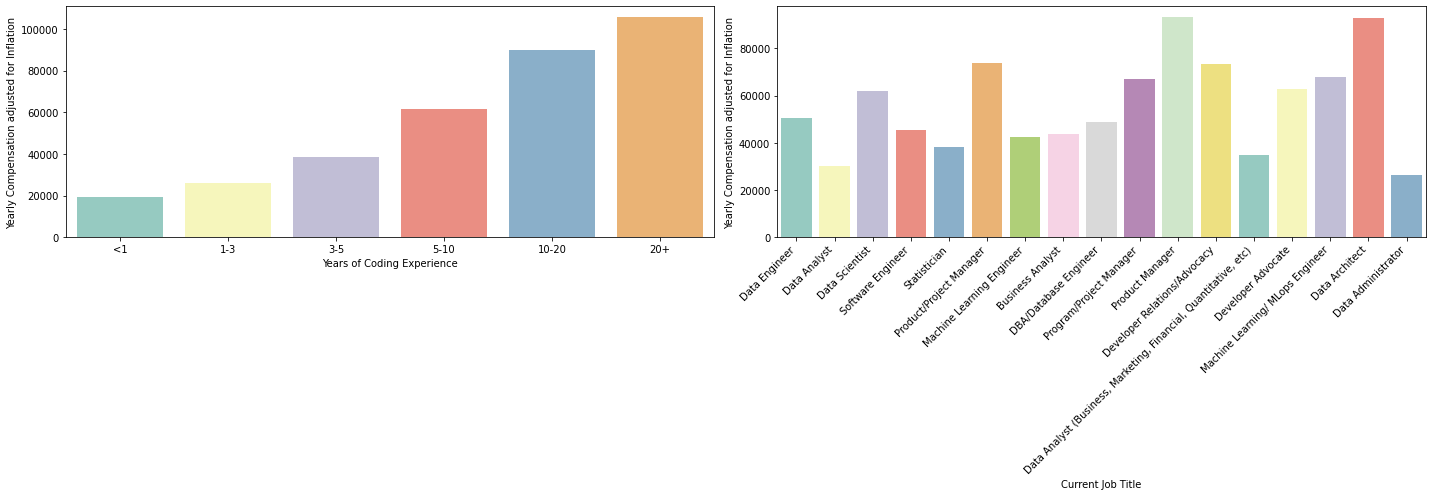

In [145]:
# Coding Experience & Job Title 
fig, axs = plt.subplots(1, 2, figsize=(20,7))

var = variables[7]  # Coding Experience
sns.barplot(x=var, y="yearly_compensation_avg_inflation", data=merged_df, ax=axs[0], palette="Set3", ci=None, order=orders.get(var))
if var in rotate_labels:
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right', va='top')  # Adjust alignment

var = variables[4]  # Current Job Title
sns.barplot(x=var, y="yearly_compensation_avg_inflation", data=merged_df, ax=axs[1], palette="Set3", ci=None, order=orders.get(var))
if var in rotate_labels:
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right', va='top')  # Adjust alignment
    
axs[0].set_ylabel("Yearly Compensation adjusted for Inflation")
axs[1].set_ylabel("Yearly Compensation adjusted for Inflation")
axs[0].set_xlabel("Years of Coding Experience")
axs[1].set_xlabel("Current Job Title")

plt.tight_layout()
plt.show()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  # Remove the CWD from sys.path while we load stuff.


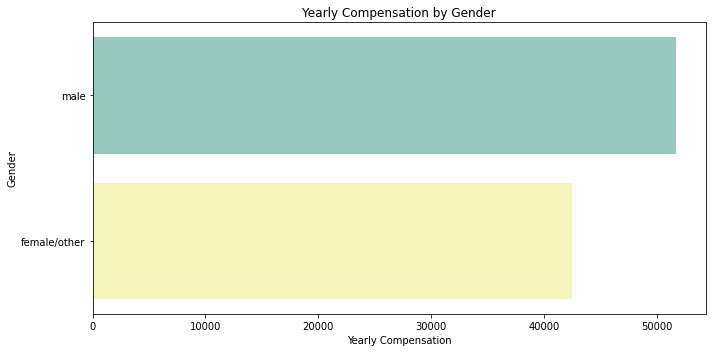

In [146]:
# Combined 'female' and 'other' due to small qty. for both genders
# Define the desired order for gender
gender_order = ['male', 'female/other']

# Combine female and other genders into a single category
merged_df['gender_combined'] = merged_df['gender'].replace({'female': 'female/other', 'other': 'female/other'})

# Plot the horizontal bar plot for gender
plt.figure(figsize=(10, 5))
sns.barplot(y='gender_combined', x="yearly_compensation_avg_inflation", data=merged_df, palette="Set3", ci=None, order=gender_order)
plt.xlabel('Yearly Compensation')
plt.ylabel('Gender')
plt.title('Yearly Compensation by Gender')
plt.tight_layout()
plt.show()

### Pie Charts (Extra)

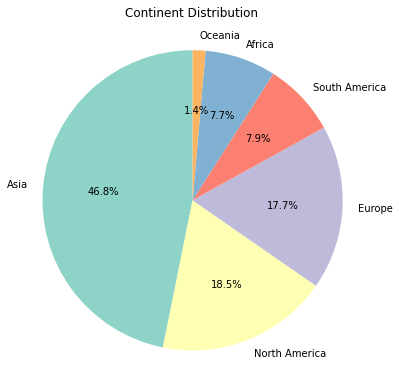

In [147]:
# Continent Pie Chart
# Calculate continent counts
continent_counts = merged_df['continent'].value_counts()

# Set the palette
palette = sns.color_palette("Set3")

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
plt.title("Continent Distribution", y=1.05)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

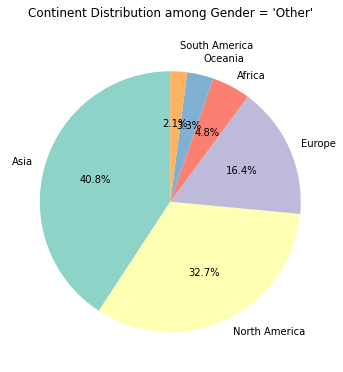

In [148]:
# Continent Pie Chart for 'Other' Gender
# Filter the data for 'other' gender
other_df = merged_df[merged_df['gender'] == 'other']

# Calculate continent counts for 'other' gender
continent_counts = other_df['continent'].value_counts()

# Set the palette
palette = sns.color_palette("Set3")

# Create a pie chart
plt.figure(figsize=(6, 6))
pie = plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
plt.title("Continent Distribution among Gender = 'Other'",  y=1.05)

# Adjust the vertical position of 'Oceania' and 'South America' labels
labels = pie[1]
label_texts = [label.get_text() for label in labels]
ocean_label = labels[label_texts.index('Oceania')]
south_america_label = labels[label_texts.index('South America')]

ocean_label.set_y(1.1)
south_america_label.set_y(1.2)

# Show the plot
plt.show()

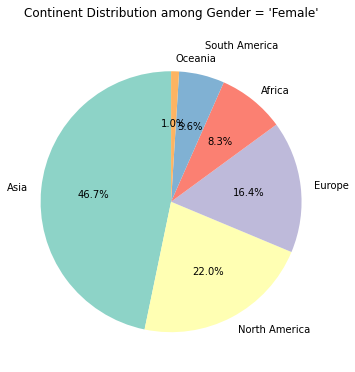

In [149]:
# Continent Pie Chart for 'female' Gender
# Filter the data for 'other' gender
other_df = merged_df[merged_df['gender'] == 'female']

# Calculate continent counts for 'other' gender
continent_counts = other_df['continent'].value_counts()

# Set the palette
palette = sns.color_palette("Set3")

# Create a pie chart
plt.figure(figsize=(6, 6))
pie = plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
plt.title("Continent Distribution among Gender = 'Female'",  y=1.05)

# Adjust the vertical position of 'Oceania' and 'South America' labels
labels = pie[1]
label_texts = [label.get_text() for label in labels]
ocean_label = labels[label_texts.index('Oceania')]
south_america_label = labels[label_texts.index('South America')]

ocean_label.set_y(1.1)
south_america_label.set_y(1.2)

# Show the plot
plt.show()

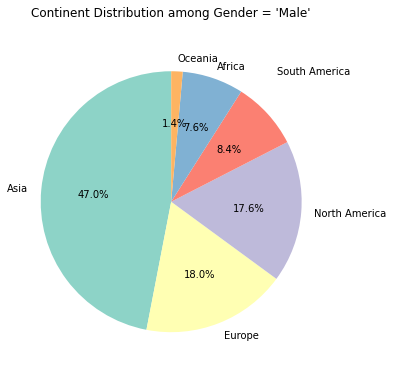

In [150]:
# Continent Pie Chart for 'male' Gender
# Filter the data for 'other' gender
other_df = merged_df[merged_df['gender'] == 'male']

# Calculate continent counts for 'other' gender
continent_counts = other_df['continent'].value_counts()

# Set the palette
palette = sns.color_palette("Set3")

# Create a pie chart
plt.figure(figsize=(6, 6))
pie = plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
plt.title("Continent Distribution among Gender = 'Male'",  y=1.05)

# Adjust the vertical position of 'Oceania' and 'South America' labels
labels = pie[1]
label_texts = [label.get_text() for label in labels]
ocean_label = labels[label_texts.index('Oceania')]
south_america_label = labels[label_texts.index('South America')]

ocean_label.set_y(1.1)
south_america_label.set_y(1.0)

# Show the plot
plt.show()

### Box Plots

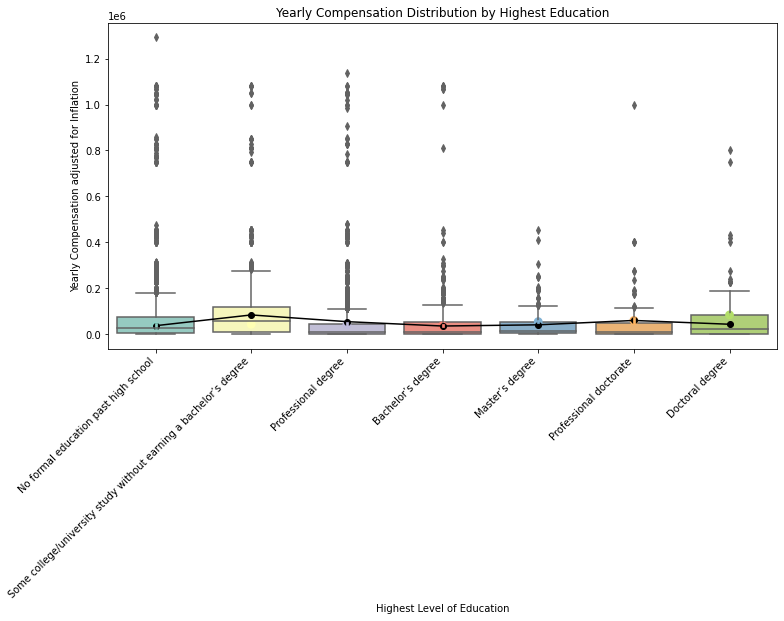

In [151]:
# Highest Level of Education
# Set the palette
palette = sns.color_palette("Set3")

# Define the variable
var = variables[5]

# Filter the data to exclude 'I prefer not to answer'
filtered_df = merged_df[merged_df[var] != 'I prefer not to answer']

# Calculate mean for line plot
means = filtered_df.groupby(var)['yearly_compensation_avg_inflation'].mean().values

# Plot the boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=var, y='yearly_compensation_avg_inflation', data=filtered_df, palette=palette)
plt.plot(np.arange(len(means)), means, marker='o', linestyle='-', color='black')
sns.pointplot(x=var, y='yearly_compensation_avg_inflation', data=filtered_df, color='black', estimator=np.mean, palette=palette, order=orders.get(var))

# Remove the tick label for 'I prefer not to answer'
labels = [label.get_text() for label in ax.get_xticklabels() if label.get_text() != 'I prefer not to answer']
ticks = [i for i, label in enumerate(ax.get_xticklabels()) if label.get_text() != 'I prefer not to answer']
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45, ha='right')

# Adjust x-axis limits
plt.xlim(-0.5, len(labels)-0.5)

# Set plot title and labels
plt.title("Yearly Compensation Distribution by Highest Education")
plt.xlabel("Highest Level of Education")
plt.ylabel("Yearly Compensation adjusted for Inflation")
plt.show()

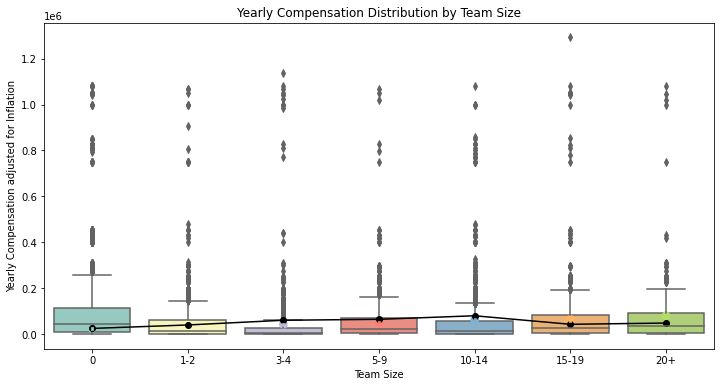

In [152]:
# Team Size
# Set the palette
palette = sns.color_palette("Set3")

var = variables[6]

# Calculate mean for line plot
means = merged_df.groupby(var)['yearly_compensation_avg_inflation'].mean().values

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=var, y='yearly_compensation_avg_inflation', data=merged_df, palette=palette)
plt.plot(np.arange(len(means)), means, marker='o', linestyle='-', color='black')
sns.pointplot(x=var, y='yearly_compensation_avg_inflation', data=merged_df, color='black', estimator=np.mean, palette=palette,  order=orders.get(var))

# Set plot title and labels
plt.title("Yearly Compensation Distribution by Team Size")
plt.xlabel("Team Size")
plt.ylabel("Yearly Compensation adjusted for Inflation")
plt.show()

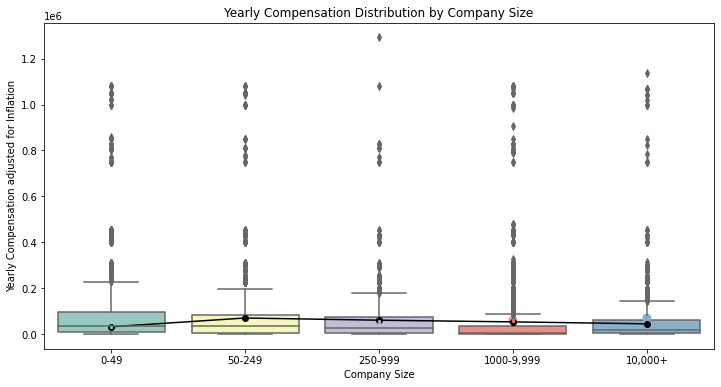

In [153]:
# Company Size
# Set the palette
palette = sns.color_palette("Set3")

var = variables[3]

# Calculate mean for line plot
means = merged_df.groupby(var)['yearly_compensation_avg_inflation'].mean().values

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=var, y='yearly_compensation_avg_inflation', data=merged_df, palette=palette)
plt.plot(np.arange(len(means)), means, marker='o', linestyle='-', color='black')
sns.pointplot(x=var, y='yearly_compensation_avg_inflation', data=merged_df, color='black', estimator=np.mean, palette=palette,  order=orders.get(var))

# Set plot title and labels
plt.title("Yearly Compensation Distribution by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Yearly Compensation adjusted for Inflation")
plt.show()

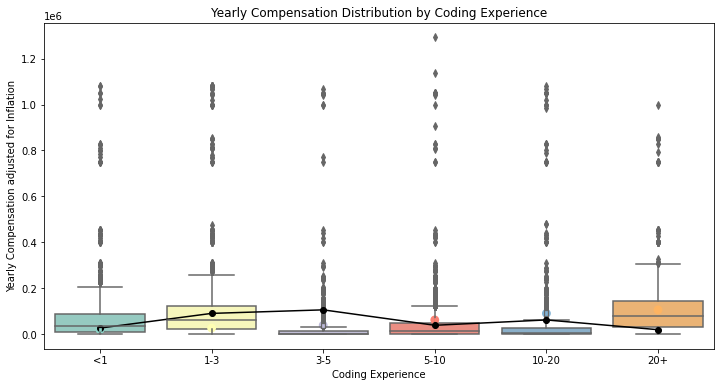

In [154]:
# Coding Experience
# Set the palette
palette = sns.color_palette("Set3")

var = variables[7]

# Calculate mean for line plot
means = merged_df.groupby(var)['yearly_compensation_avg_inflation'].mean().values

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=var, y='yearly_compensation_avg_inflation', data=merged_df, palette=palette)
plt.plot(np.arange(len(means)), means, marker='o', linestyle='-', color='black')
sns.pointplot(x=var, y='yearly_compensation_avg_inflation', data=merged_df, color='black', estimator=np.mean, palette=palette,  order=orders.get(var))

# Set plot title and labels
plt.title("Yearly Compensation Distribution by Coding Experience")
plt.xlabel("Coding Experience")
plt.ylabel("Yearly Compensation adjusted for Inflation")
plt.show()

### Proportion Over 90k

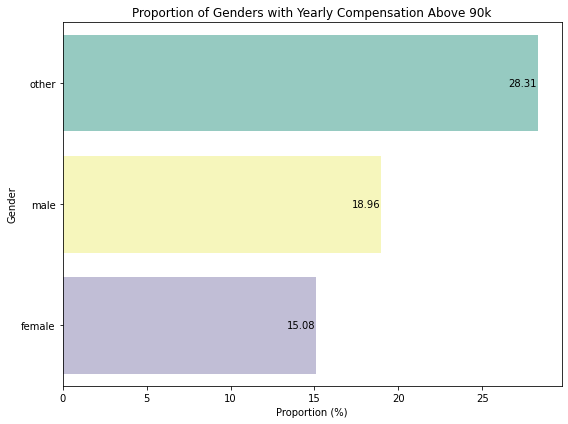

In [155]:
# Gender
# Calculate proportions for gender
total_counts = merged_df['gender'].value_counts()
high_income_counts = merged_df[merged_df['yearly_compensation_avg_inflation'] > 90000]['gender'].value_counts()
proportions = high_income_counts / total_counts * 100
proportions = proportions.dropna()
proportions = proportions.sort_values(ascending=False)
proportions_df = pd.DataFrame({'Gender': proportions.index, 'Proportion': proportions.values})

# Set the palette
palette = sns.color_palette("Set3")

# Plot Gender proportions
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# Gender proportions
sns.barplot(data=proportions_df, y='Gender', x='Proportion', order=proportions_df['Gender'], ax=axs, palette=palette)
axs.set_xlabel('Proportion (%)')
axs.set_ylabel('Gender')
axs.set_title('Proportion of Genders with Yearly Compensation Above 90k')


# Add data labels to the bar chart
for bar in axs.patches:
    width = bar.get_width()
    axs.annotate(format(width, '.2f'),
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(-15, 0),  # Adjust the xytext to position the labels inside the bars
                    textcoords='offset points',
                    ha='center',
                    va='center')

plt.tight_layout()
plt.show()

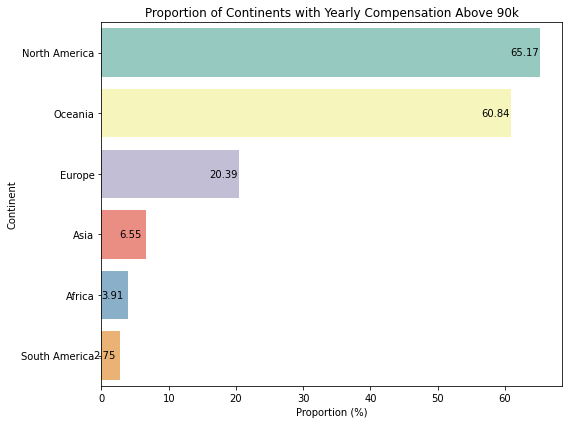

In [156]:
# Continent
# Calculate proportions for continent
total_counts = merged_df['continent'].value_counts()
high_income_counts = merged_df[merged_df['yearly_compensation_avg_inflation'] > 90000]['continent'].value_counts()
proportions = high_income_counts / total_counts * 100
proportions = proportions.dropna()
proportions = proportions.sort_values(ascending=False)
proportions_df = pd.DataFrame({'Continent': proportions.index, 'Proportion': proportions.values})

# Set the palette
palette = sns.color_palette("Set3")

# Plot Continent proportions
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# Continent proportions
sns.barplot(data=proportions_df, y='Continent', x='Proportion', order=proportions_df['Continent'], ax=axs, palette=palette)
axs.set_xlabel('Proportion (%)')
axs.set_ylabel('Continent')
axs.set_title('Proportion of Continents with Yearly Compensation Above 90k')

# Add data labels to the bar chart
for bar in axs.patches:
    width = bar.get_width()
    axs.annotate(format(width, '.2f'),
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(-15, 0),  # Adjust the xytext to position the labels inside the bars
                    textcoords='offset points',
                    ha='center',
                    va='center')

plt.tight_layout()
plt.show()

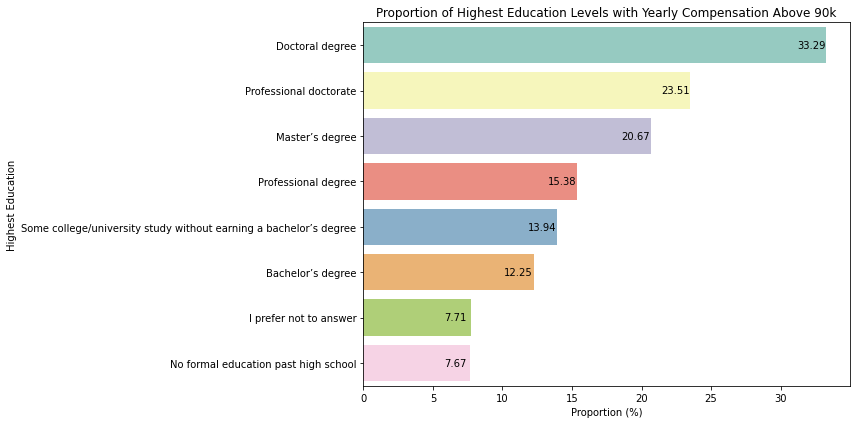

In [157]:
# Education
# Calculate proportions for highest education
total_counts = merged_df['highest_education'].value_counts()
high_income_counts = merged_df[merged_df['yearly_compensation_avg_inflation'] > 90000]['highest_education'].value_counts()
proportions = high_income_counts / total_counts * 100
proportions = proportions.dropna()
proportions = proportions.sort_values(ascending=False)
proportions_df = pd.DataFrame({'Highest Education': proportions.index, 'Proportion': proportions.values})

# Set the palette
palette = sns.color_palette("Set3")

# Plot Highest Education proportions
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

# Highest Education proportions
sns.barplot(data=proportions_df, y='Highest Education', x='Proportion', order=proportions_df['Highest Education'], ax=axs, palette=palette)
axs.set_xlabel('Proportion (%)')
axs.set_ylabel('Highest Education')
axs.set_title('Proportion of Highest Education Levels with Yearly Compensation Above 90k')

# Add data labels to the bar chart
for bar in axs.patches:
    width = bar.get_width()
    axs.annotate(format(width, '.2f'),
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(-15, 0),  # Adjust the xytext to position the labels inside the bars
                    textcoords='offset points',
                    ha='center',
                    va='center')

plt.tight_layout()
plt.show()

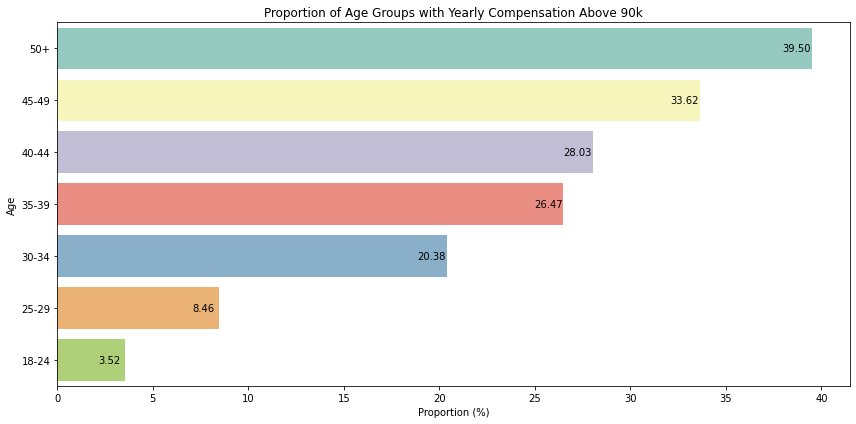

In [158]:
# Age
# Calculate proportions for age
total_counts = merged_df['age'].value_counts()
high_income_counts = merged_df[merged_df['yearly_compensation_avg_inflation'] > 90000]['age'].value_counts()
proportions = high_income_counts / total_counts * 100
proportions = proportions.dropna()
proportions = proportions.sort_values(ascending=False)
proportions_df = pd.DataFrame({'Age': proportions.index, 'Proportion': proportions.values})

# Set the palette
palette = sns.color_palette("Set3")

# Plot Age proportions with wider figure size
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

# Age proportions
sns.barplot(data=proportions_df, y='Age', x='Proportion', order=proportions_df['Age'], ax=axs, palette=palette)
axs.set_xlabel('Proportion (%)')
axs.set_ylabel('Age')
axs.set_title('Proportion of Age Groups with Yearly Compensation Above 90k')

# Add data labels to the bar chart
for bar in axs.patches:
    width = bar.get_width()
    axs.annotate(format(width, '.2f'),
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(-15, 0),  # Adjust the xytext to position the labels inside the bars
                    textcoords='offset points',
                    ha='center',
                    va='center')

plt.tight_layout()
plt.show()

### Interactive Proportion Plot

In [ ]:
# Year
# Create a mapping for salary categories and their actual buckets
salary_mapping = {'0': '0-25k', '1': '25k-60k', '2': '60k-90k', '3': '90k-125k', '4': '125k+'}
salary_order = ['0-25k', '25k-60k', '60k-90k', '90k-125k', '125k+']

# Group the data by year and salary bucket and calculate the count
grouped = merged_df.groupby(['year', 'yearly_compensation_encoded']).size().reset_index(name='count')

# Map the encoded salary category to the actual categories
grouped['yearly_compensation_encoded'] = grouped['yearly_compensation_encoded'].map(salary_mapping)
grouped['yearly_compensation_encoded'] = pd.Categorical(grouped['yearly_compensation_encoded'], categories=salary_order, ordered=True)

# Pivot the data to have salary buckets as the columns and year as the index
pivot_df = grouped.pivot(index='year', columns='yearly_compensation_encoded', values='count')

# Calculate the proportion for each salary bucket in each year
proportions = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
fig = px.bar(
    proportions,
    x=proportions.index,
    y=proportions.columns,
    labels={'value': 'Proportion (%)', 'year': 'Year'},
    title='Proportion of Salary Categories for Each Year',
    hover_data={'value': True},
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Set2,
    width=800,
    height=600
)

# Customize the legend
fig.update_layout(legend_title_text='Salary Category')

# Rotate x-axis labels for better visibility if needed
fig.update_xaxes(tickangle=-45)

# Show the figure
fig.show()

In [ ]:
# Job Title
# Create a mapping for salary categories and their actual buckets
salary_mapping = {'0': '0-25k', '1': '25k-60k', '2': '60k-90k', '3': '90k-125k', '4': '125k+'}
salary_order = ['0-25k', '25k-60k', '60k-90k', '90k-125k', '125k+']

# Group the data by current job title and salary bucket and calculate the count
grouped = merged_df.groupby(['current_job_title', 'yearly_compensation_encoded']).size().reset_index(name='count')

# Map the encoded salary category to the actual categories
grouped['yearly_compensation_encoded'] = grouped['yearly_compensation_encoded'].map(salary_mapping)
grouped['yearly_compensation_encoded'] = pd.Categorical(grouped['yearly_compensation_encoded'], categories=salary_order, ordered=True)

# Pivot the data to have salary buckets as the columns and current job title as the index
pivot_df = grouped.pivot(index='current_job_title', columns='yearly_compensation_encoded', values='count')

# Calculate the proportion for each salary bucket in each current job title
proportions = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
fig = px.bar(
    proportions,
    x=proportions.index,
    y=proportions.columns,
    labels={'value': 'Proportion (%)', 'current_job_title': 'Jot Titles'},
    title='Proportion of Salary Categories for  Current Job Title',
    hover_data={'value': True},
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Set2,
    width=800,
    height=800
)

# Customize the legend
fig.update_layout(legend_title_text='Salary Category')

# Rotate x-axis labels for better visibility if needed
fig.update_xaxes(tickangle=-45)

# Show the figure
fig.show()